# Data-Driven Analysis of the State of the Serbian Economy and Welfare

&emsp;Before we start, I would like to say a few words regarding the motivation behind this project. Serbia, as we know it, is not mentioned much around the world besides sports circles where Serbian athletes shine. It would be great if I could also say that about its economy and general state, but that is not the case. That is why I wanted to dig into this subject a bit more and hopefully draw some useful conclusions. <br><br>
&emsp;I will give my best to try to stick with strictly data-driven approaches as much as possible and remain unbiased. But, as it was mentioned in the Glossary, it won't be 100% possible, given the incompetence of the data that I have at my disposal to work with. <br><br>
&emsp;Being unbiased in this situation is especially important since the Serbian government is notorious for its bad decisions and corruption. That is also one of the reasons I decided to this project, I want to see the other side of the story and share it with whoever happens to read my work. Data always gives new insights and tells the story from a different point and I hope that that is going to be the case this time also. <br><br>
&emsp;Enjoy!

## Location

&emsp;Serbia is located in the South-Eastern part of Europe, on the Balkan Peninsula. It shares borders with 9 countries - Hungary, Romania, Bulgaria, North Macedonia, Kosovo*, Albania*, Montenegro, Bosnia & Herzegovina and Croatia. <br><br>
&emsp;It is a landlocked country thus, it has to relly on river traffic for overwater trading and transportation. The north is characterized by Pannonian depression, which makes it perfect for agricultural and livestock breeding activities. Middle and Southern part is rockier and gets steeper as we go more towards the South, characterized by hills and mountains, that is the place of more industrial and other non-agricultural activities (apart from hilly regions where fruit growing and viticulture prevails). <br><br>
*Kosovo is a self-proclaimed state founded in 2008, since it is still not a fully recognized state, the dispute of the Serbian border depends on the choice a country has made to or not to recognize Kosovo. Thus, for the countries that recognize it, Serbia shares border with Kosovo and not with Albania, and if it does, then otherwise is true. Nevertheless, the Serbian government has no authority to run any statistical analysis in that region and that EXCLUDES KOSOVO FROM THIS ANALYSIS.

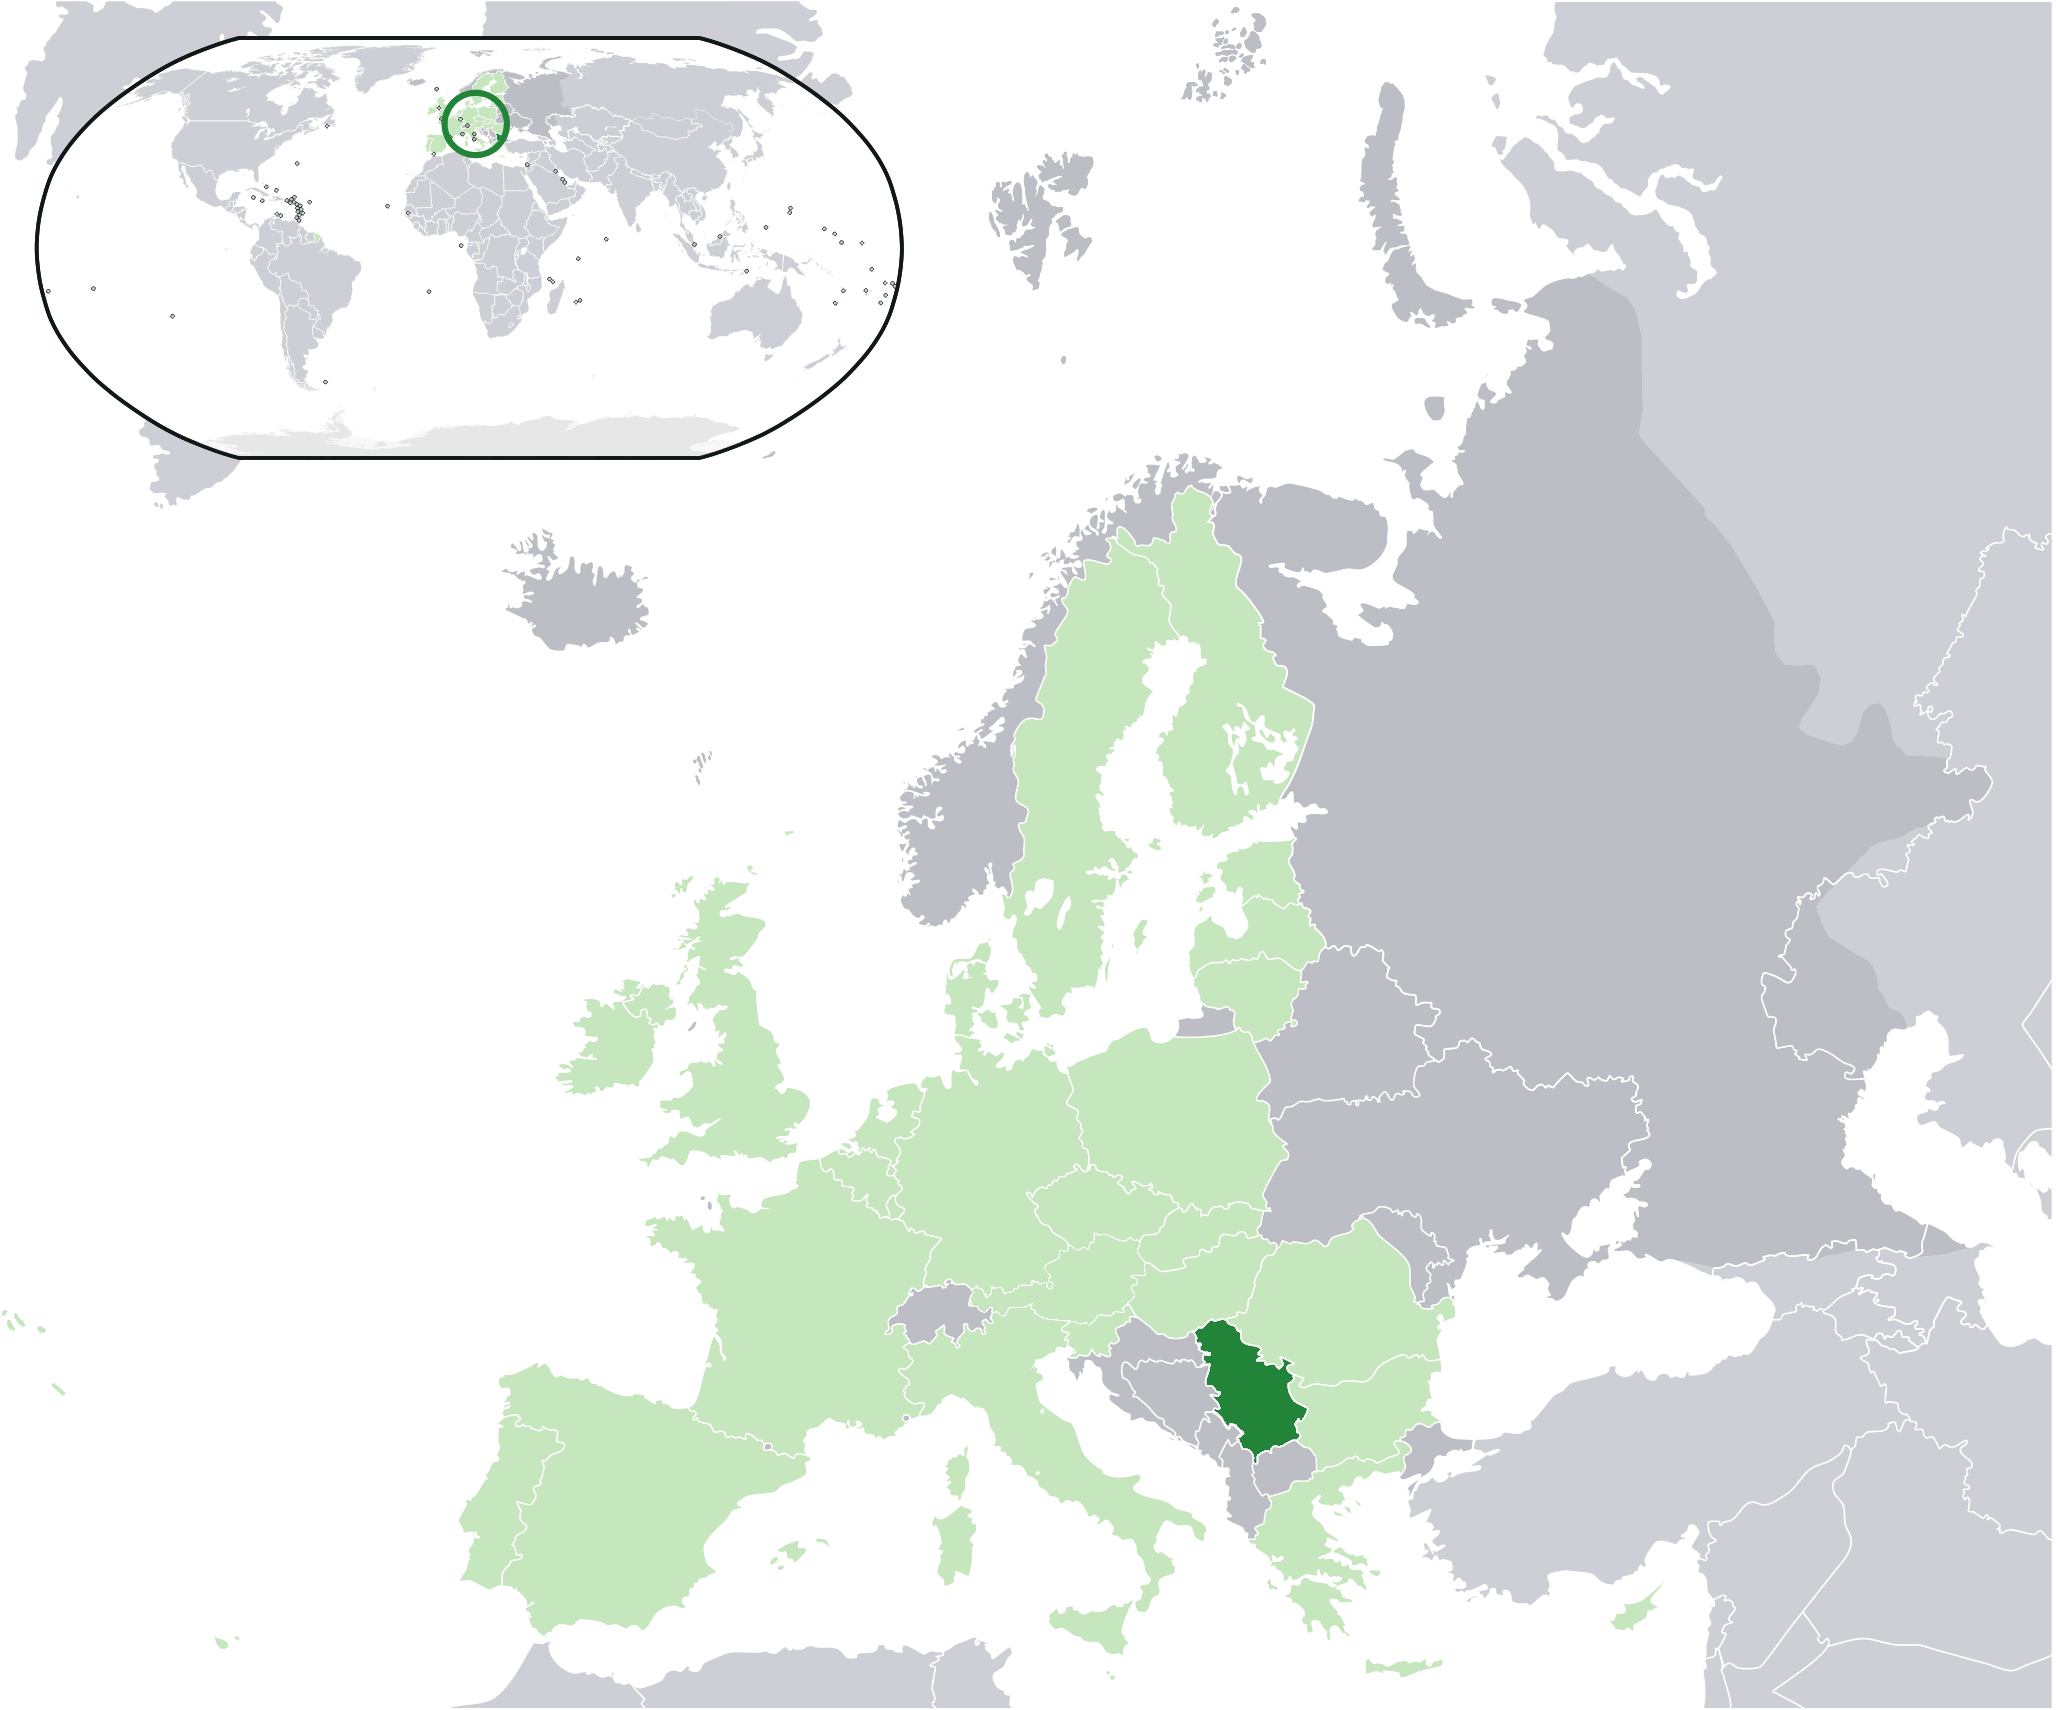

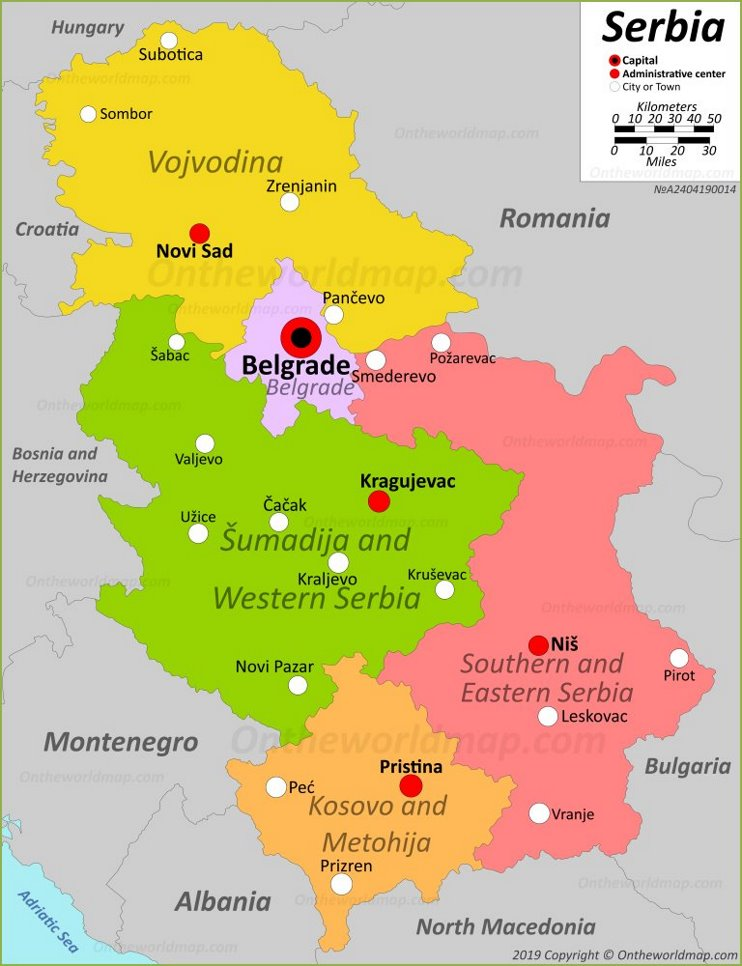

NOTE: The Region of Šumadija and Western Serbia is referred to as "Central and Western" for readability reasons.

# EDA

In [73]:
import numpy as np
import pandas as pd
import easydatascience as eds

pd.set_option('float_format', '{:f}'.format)
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the Plotting Parameters
plt.style.use('seaborn')

sns.set_palette('Blues')
dcolor = '#6179FF'
sbgcolor = '#8497FF'
bgcolor = '#BCC6FF'
d2color = '#FF6161'
sbg2color = '#FF8484'
bg2color = '#FFBCBC'

slabel = 14
stitle = 20

## Government Accounts
### GDP and Growth

In [74]:
gdp = pd.read_csv('gdp.csv')
gov_tax = pd.read_csv('gov_tax.csv')
gov_investitions = pd.read_csv('gov_tax.csv')

gdp_df = gdp.loc[gdp['Account']=='GDP'].reset_index(drop=True)
gva = gdp.loc[gdp['Account']=='GrossValueAdded'].reset_index(drop=True)
product_subventions = gdp.loc[gdp['Account']=='ProductSubventions'].reset_index(drop=True)
product_tax = gdp.loc[gdp['Account']=='ProductTax'].reset_index(drop=True)

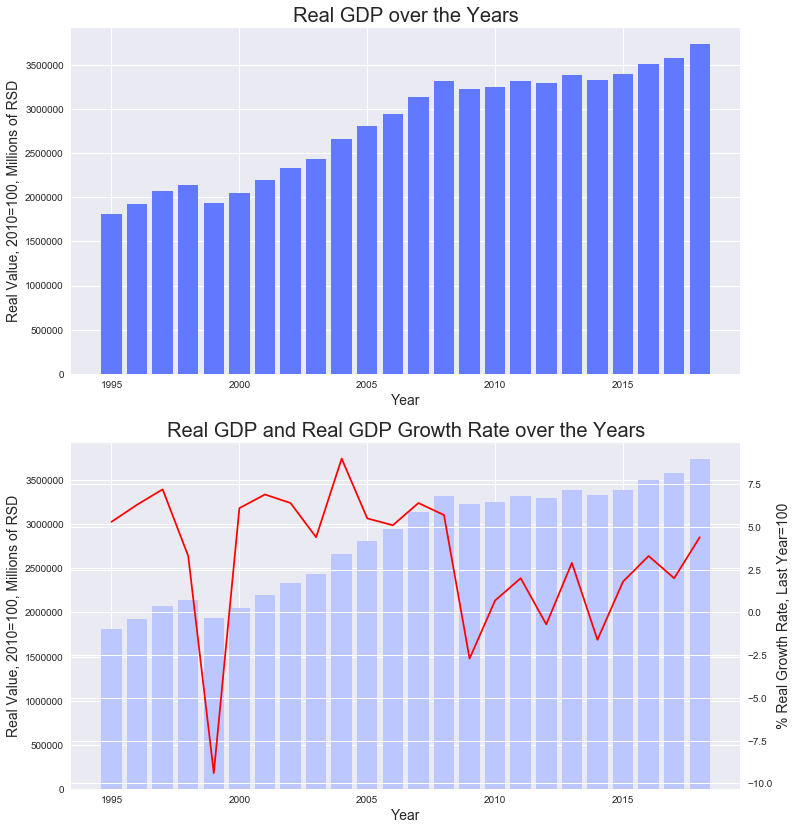

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
ax[0].bar('Year', 'RealValue(mRSD,2010=100)', data=gdp_df, color=dcolor)
ax[0].set_xlabel('Year', fontsize=slabel)
ax[0].set_ylabel('Real Value, 2010=100, Millions of RSD', fontsize=slabel)
ax[0].set_title('Real GDP over the Years', fontsize=stitle)

ax[1].bar('Year', 'RealValue(mRSD,2010=100)', data=gdp_df, color=bgcolor)
ax[1].set_xlabel('Year', fontsize=slabel)
ax[1].set_ylabel('Real Value, 2010=100, Millions of RSD', fontsize=slabel)
ax[1].set_title('Real GDP and Real GDP Growth Rate over the Years', fontsize=stitle)

ax1 = ax[1].twinx()
ax1.plot('Year', 'RealGrowthRatePct(LastYear=100)', data=gdp_df, color='r')
ax1.set_ylabel('% Real Growth Rate, Last Year=100', fontsize=slabel);

&emsp;Here, we can see the representation of the state's real GDP and GDP growth since 1995. Growth and GDP drops are visually represented and can be seen:<br>
    - 1999 - NATO bombing
    - 2009 - The Great Recession
    - 2013 - Serbian recession in 2012 and recovery in 2013
    - 2014 - Southeast Europe floods
&emsp;We are going to regularly come back to these years throughout the notebook so have them always in mind while reading this EDA.

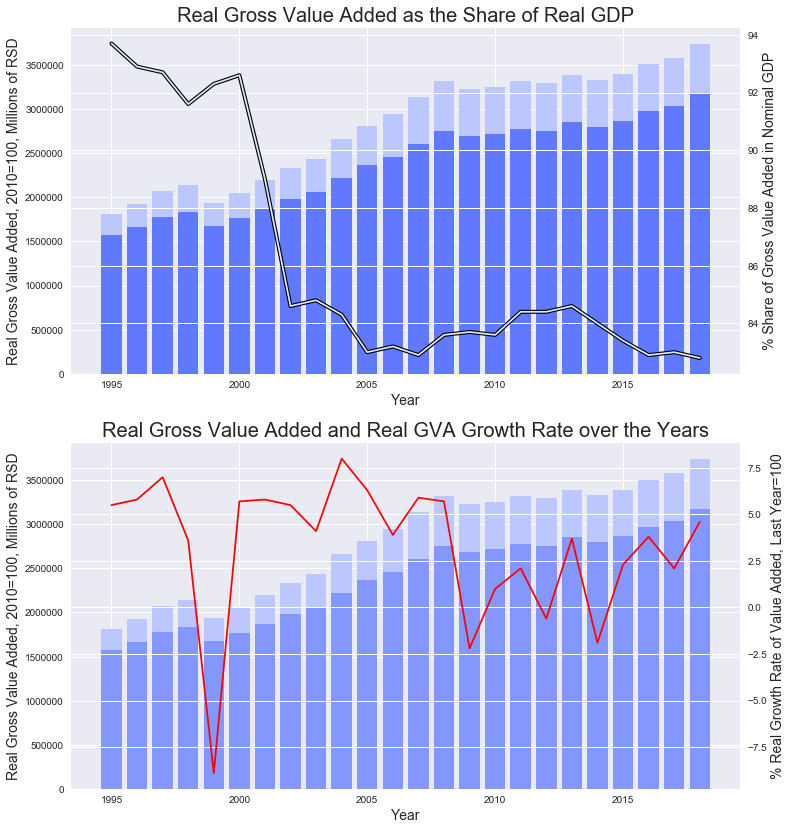

In [76]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
ax[0].bar('Year', 'RealValue(mRSD,2010=100)', data=gdp_df, color=bgcolor)
ax[0].bar('Year', 'RealValue(mRSD,2010=100)', data=gva, color=dcolor)
ax[0].set_xlabel('Year', fontsize=slabel)
ax[0].set_ylabel('Real Gross Value Added, 2010=100, Millions of RSD', fontsize=slabel)
ax[0].set_title('Real Gross Value Added as the Share of Real GDP', fontsize=stitle)

#% of the Nominal GDP
ax1 = ax[0].twinx()
ax1.plot('Year', '%NominalGDP', data=gva, color='k', linewidth=4)
ax1.plot('Year', '%NominalGDP', data=gva)
ax1.set_ylabel('% Share of Gross Value Added in Nominal GDP', fontsize=slabel)

ax[1].bar('Year', 'RealValue(mRSD,2010=100)', data=gdp_df, color=bgcolor)
ax[1].bar('Year', 'RealValue(mRSD,2010=100)', data=gva, color=sbgcolor)
ax[1].set_xlabel('Year', fontsize=slabel)
ax[1].set_ylabel('Real Gross Value Added, 2010=100, Millions of RSD', fontsize=slabel)
ax[1].set_title('Real Gross Value Added and Real GVA Growth Rate over the Years', 
                fontsize=stitle)

ax2 = ax[1].twinx()
ax2.plot('Year', 'RealGrowthRatePct(LastYear=100)', data=gva, color='r')
ax2.set_ylabel('% Real Growth Rate of Value Added, Last Year=100', fontsize=slabel);

&emsp;It looks like the GVA was decreasing over the years. It should imply that the Product Tax has been steadily rising. We can easily confirm it. 

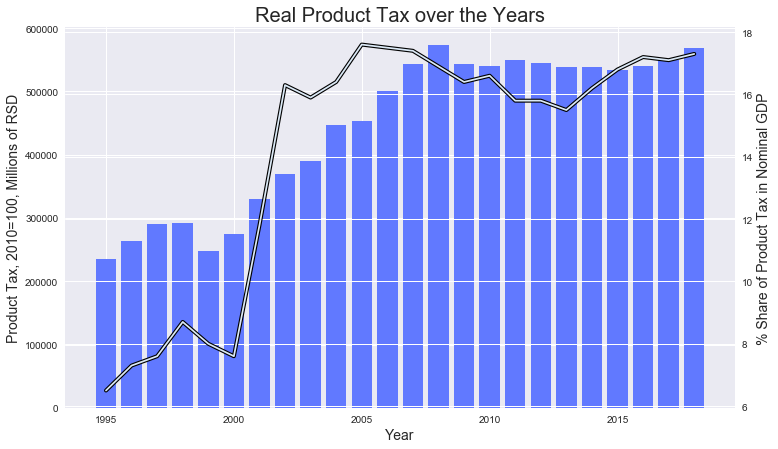

In [77]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar('Year', 'RealValue(mRSD,2010=100)', data=product_tax, color=dcolor)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Product Tax, 2010=100, Millions of RSD', fontsize=slabel)
ax.set_title('Real Product Tax over the Years', fontsize=stitle)

#% Share in the Real GDP
ax1 = ax.twinx()
ax1.plot('Year', '%NominalGDP', data=product_tax, color='k', linewidth=4)
ax1.plot('Year', '%NominalGDP', data=product_tax)
ax1.set_ylabel('% Share of Product Tax in Nominal GDP', fontsize=slabel);

&emsp;There seems to be a sudden shift in the % Share of Product Tax in Nominal GDP from the year 2000-2002. Apparently, after the breakup of Yugoslavia, the Serbian and Montenegrin (which made up Yugoslavia in that period) governments made a big effort in reforming their tax systems. Before that point, tax evasion was widespread and after the reform, the Serbian government concluded that per __OECD Economic Surveys: Federal Republic of Yugoslavia 2002__:<br><br>
&emsp;_"The reforms were overall successful since tax revenues to the consolidated state budget increased by more than 2 percent of GDP in 2001 relative to 2000."_

### Government Taxes

&emsp;NOTE: Since the precise tax data dates only back to 2005, we won't be able to analyze the tax reform of the country.<br>
&emsp;NOTE: Transaction Types overlap, so pie charts are not going to be our first option when plotting classes that relate for something "whole"

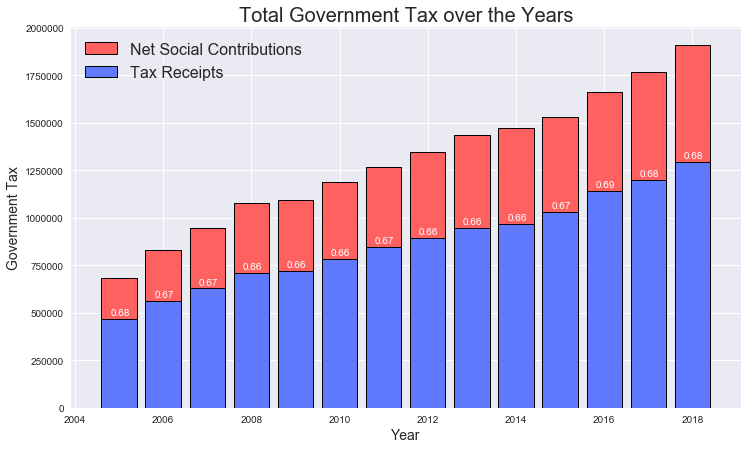

In [78]:
pd.set_option('display.precision',6)
gov_tax = pd.read_csv('gov_tax.csv').fillna(0)

total_tax = gov_tax.loc[gov_tax['TransactionType']=='Total']
tax_receipts = gov_tax.loc[gov_tax['TransactionType']=='Tax Receipts']

fig,ax = plt.subplots(figsize=(12, 7))
ax.bar('Year', 'Amount(mRSD)', data=total_tax, color=d2color, 
       label='Net Social Contributions', edgecolor='k', linewidth=1)
bars = ax.bar('Year', 'Amount(mRSD)', data=tax_receipts, color=dcolor, 
              label='Tax Receipts', edgecolor='k', linewidth=1)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Government Tax', fontsize=slabel)
ax.set_title('Total Government Tax over the Years', fontsize=stitle)
ax.legend(prop={'size':16})
    
for bar, pct in zip(bars, tax_receipts['PctTotal']):
    yval = bar.get_height()
    ax.text(bar.get_x()+0.2, yval+20000, round(pct, 2), color='w')

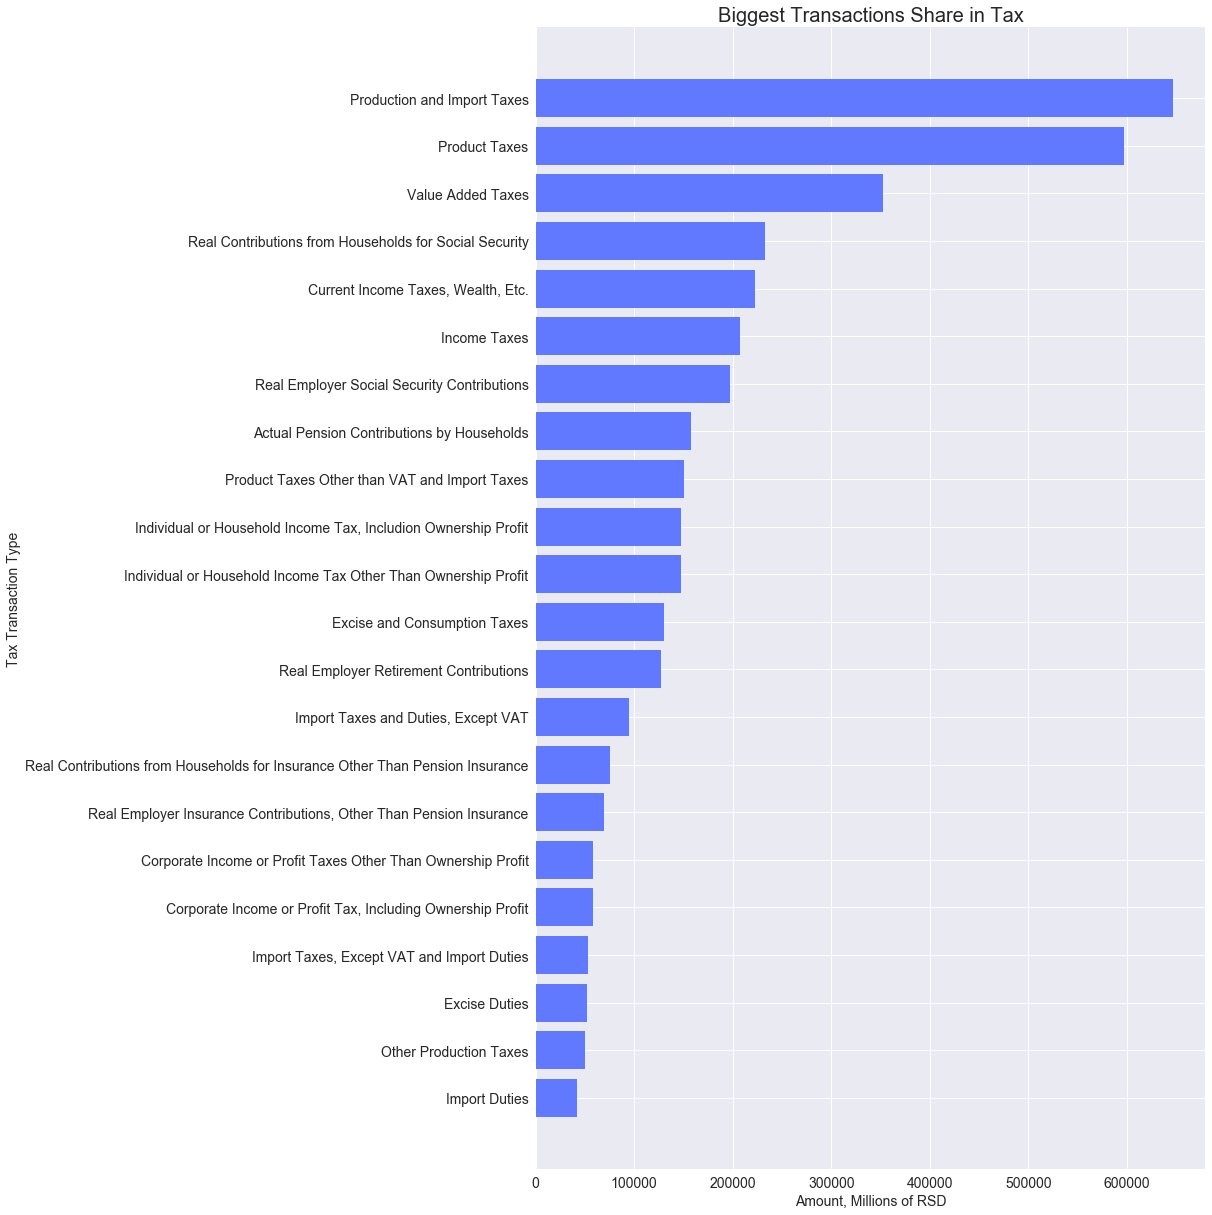

--------------------- 
AVERAGE PERCENTAGES AND VALUES:
----------------------


TransactionType  Amount(mRSD)  PctTotal
0                                       Import Duties  41584.333000  3.600000
1                              Other Production Taxes  49898.500000  3.800000
2                                       Excise Duties  52169.726000  3.700000
3          Import Taxes, Except VAT and Import Duties  52799.698000  3.700000
4   Corporate Income or Profit Tax, Including Owne...  58115.451000  4.100000
5   Corporate Income or Profit Taxes Other Than Ow...  58115.451000  4.100000
6   Real Employer Insurance Contributions, Other T...  69740.619000  5.500000
7   Real Contributions from Households for Insuran...  75759.455000  6.000000
8                 Import Taxes and Duties, Except VAT  94384.027000  7.300000
9              Real Employer Retirement Contributions 127576.814000  9.800000
10                       Excise and Consumption Taxes 130291.340000  9.800000
11  Individual or Household Income Tax Other Than ... 147166.674000 11.600000
12  Individual or Household Income Tax, Includion ... 147166.674000 11.600000
13      Product Taxes Other than VAT and Import Taxes 150658.593000 11.400000
14         Actual Pension Contributions by Households 157196.048000 11.900000
15        Real Employer Social Security Contributions 197317.422000 15.200000
16                                       Income Taxes 207405.351000 15.900000
17                 Current Income Taxes, Wealth, Etc. 222468.275000 17.100000
18  Real Contributions from Households for Social ... 232955.481000 17.900000
19                                  Value Added Taxes 352080.728000 27.200000
20                                      Product Taxes 597123.356000 45.900000
21                        Production and Import Taxes 647021.855000 49.700000

In [79]:
#Biggest parts
tax_share = gov_tax.groupby('TransactionType')[['Amount(mRSD)',
                                                'PctTotal']].mean().round(3)
tax_share = tax_share.reset_index()
drop_tax = ['Total', 'Net Social Contributions', 'Tax Receipts']
tax_share = tax_share.loc[~tax_share['TransactionType'].isin(drop_tax)]
tax_share = tax_share.loc[tax_share['PctTotal']>0.02]
tax_share = tax_share.sort_values('Amount(mRSD)').reset_index(drop=True)

tax_share['PctTotal'] = tax_share['PctTotal'] * 100

fig, ax = plt.subplots(figsize=(12, 21))

ax.barh('TransactionType', 'Amount(mRSD)', data=tax_share, color=dcolor)
ax.set_ylabel('Tax Transaction Type', fontsize=slabel)
ax.set_xlabel('Amount, Millions of RSD', fontsize=slabel)
ax.set_title('Biggest Transactions Share in Tax', fontsize=stitle)
ax.tick_params(axis='both', which='major', labelsize=slabel)

tax_shares = tax_share['TransactionType'].unique()

plt.show()
print(21*'-', '\nAVERAGE PERCENTAGES AND VALUES:\n----------------------')
display(tax_share)

&emsp;Here are some candidates and their average tax revenue values that we could analyze. Many of them overlap so that is going to pose a problem but we'll see what we can do.

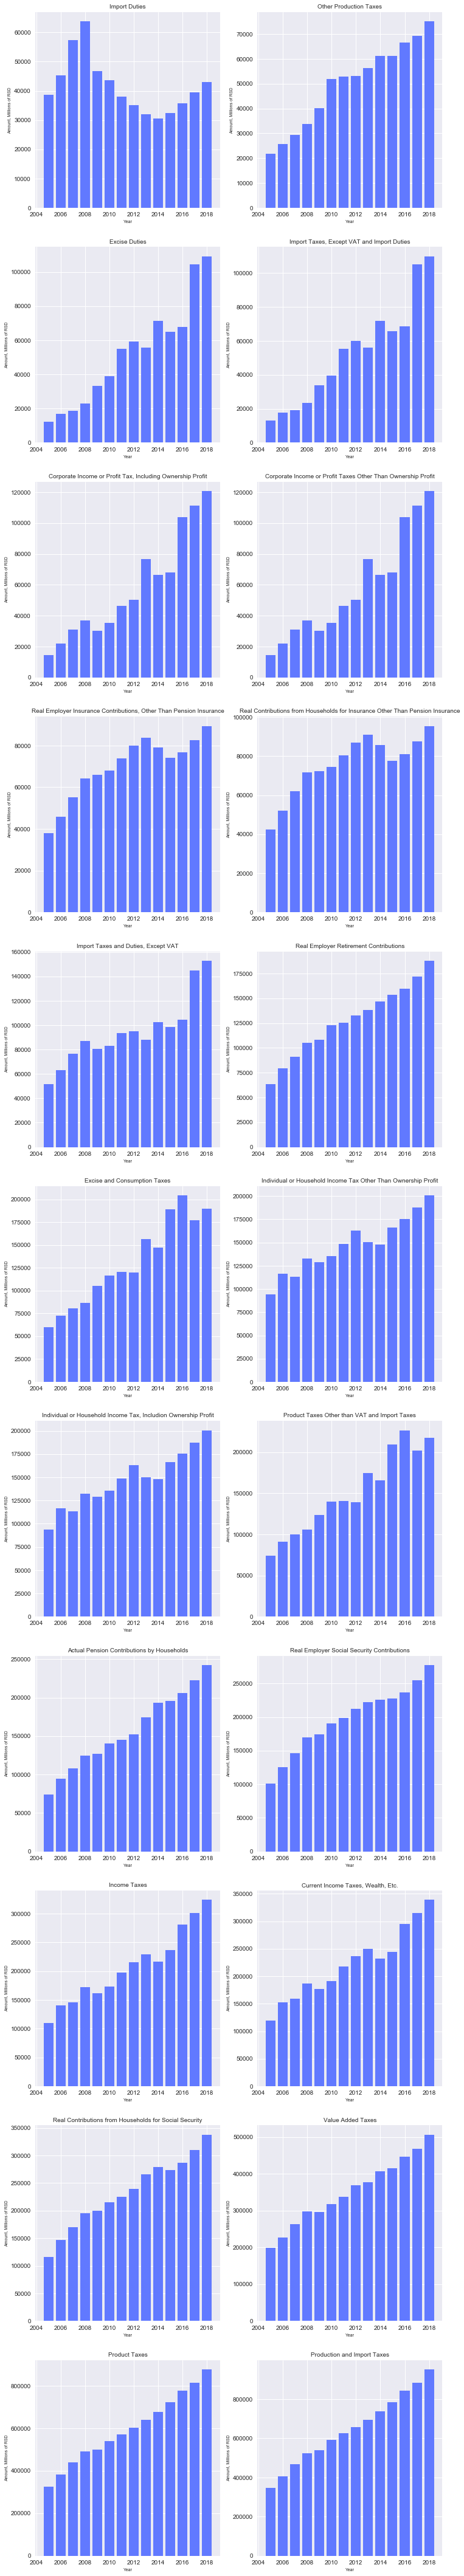

In [80]:
fig, ax = plt.subplots(11, 2, figsize=(12, 77))
ax = ax.flatten()

for idx, ttype in enumerate(tax_shares):
    curr_data = gov_tax.loc[gov_tax['TransactionType']==ttype]
    ax[idx].bar('Year', 'Amount(mRSD)', data=curr_data, color=dcolor)
    ax[idx].set_title(ttype, fontsize=10)
    ax[idx].set_xlabel('Year', fontsize=7)
    ax[idx].set_ylabel('Amount, Millions of RSD', fontsize=7)

Here we can see some interesting patterns:
- Steadily growing - Like Product Taxes and Production and Import Taxes
- Pulling back while the time of a recession - Like Income Taxes and Current Income Taxes
- Pulling back and taking time to recover from a recession - Like Corporate Income and Profit and Ownership Tax

Still, four interesting candidates arise: 
- Product Taxes Other than VAT and Import Taxes, Excise and Consumption Taxes, Import Taxes and Duties Except VAT

In [81]:
examine_taxes = ['Product Taxes Other than VAT and Import Taxes',
                 'Excise and Consumption Taxes',
                 'Import Taxes and Duties, Except VAT']

print('The losses in 2017 with respect to 2016:\n')
for ttype in examine_taxes:
    curr_data = gov_tax.loc[gov_tax['TransactionType']==ttype]
    sixteen = curr_data.loc[curr_data['Year']==2016]['Amount(mRSD)'].values[0]
    seventeen = curr_data.loc[curr_data['Year']==2017]['Amount(mRSD)'].values[0]
    loss = sixteen-seventeen
    print('  -', ttype, ':', round(loss, 2), 'mRSD')

The losses in 2017 with respect to 2016:

  - Product Taxes Other than VAT and Import Taxes : 24667.2 mRSD
  - Excise and Consumption Taxes : 27155.73 mRSD
  - Import Taxes and Duties, Except VAT : -40278.86 mRSD


&emsp;In 2017, Serbia was hit with severe droughts which impacted its agriculture horribly and the impact could be seen all over the country and its economy. Locally grown products economy was heavily impacted and so, Serbia had to import more, which explains the fall in the tax gain from Product and Consumption spendings and in return, increased tax revenue from a bigger importing activity.

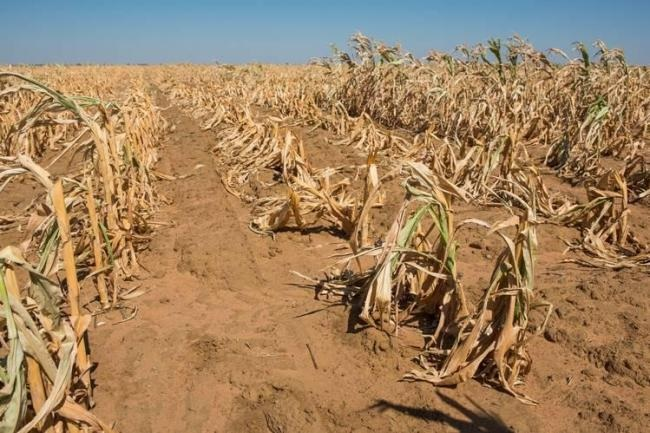

### Quartal Value Added by Actions

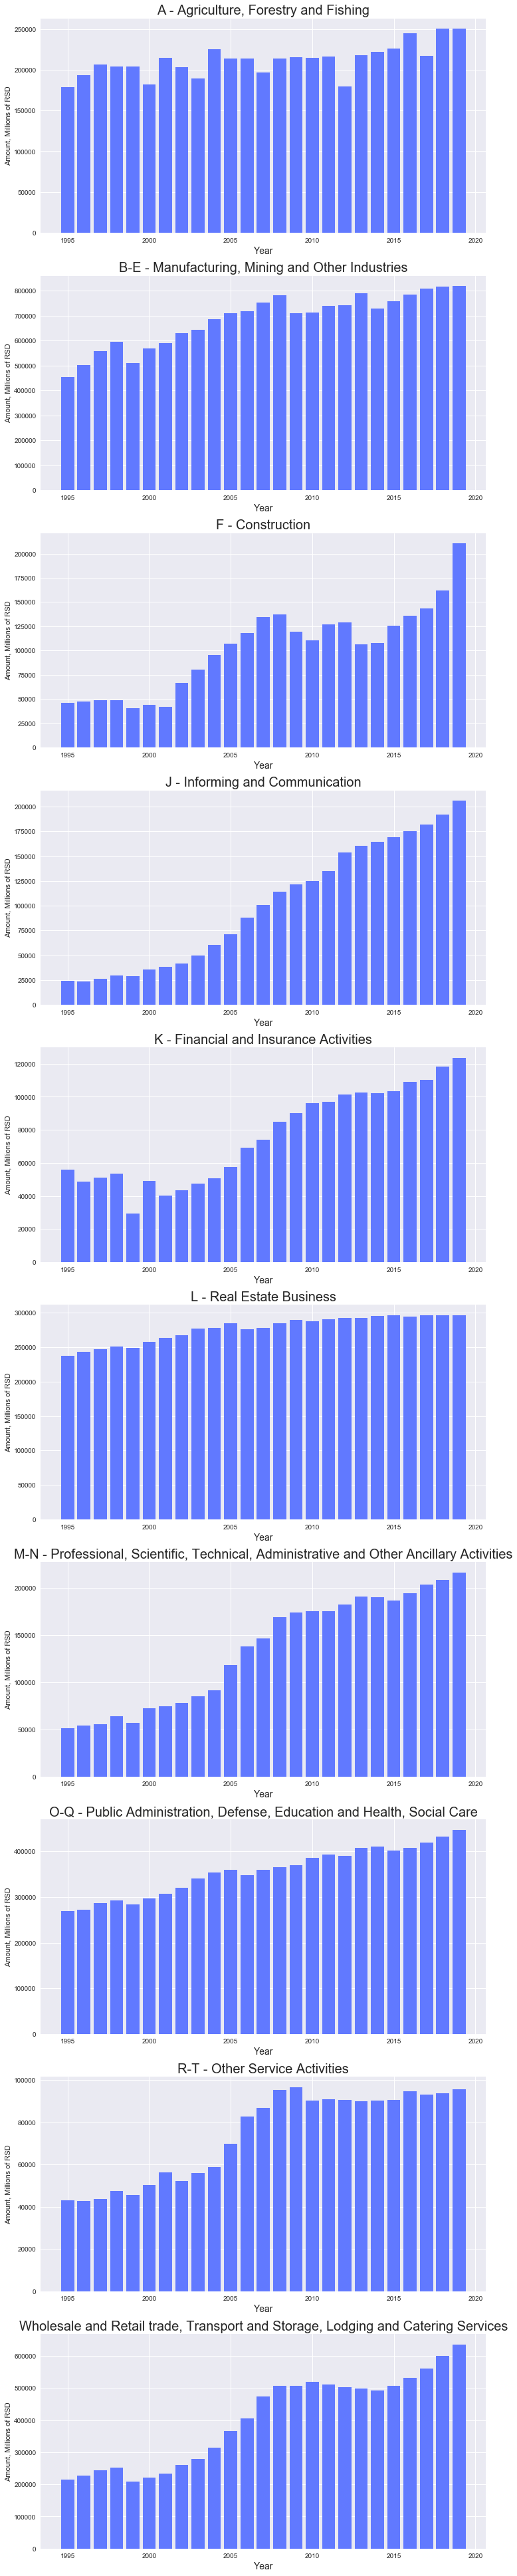

In [82]:
qav_actions = pd.read_csv('qav_actions.csv')

av_actions = qav_actions.groupby(['Year', 'Action']).sum().reset_index()
av_actions = av_actions[['Year', 'Action', 'RealValue(mRSD,2010=100)']]

ava_total = av_actions.loc[av_actions['Action']=='Total'].reset_index(drop=True)
av_actions = av_actions.loc[av_actions['Action']!='Total'].reset_index(drop=True)

fig, ax = plt.subplots(10, 1, figsize=(12, 70))
ax = ax.flatten()

for idx, action in enumerate(av_actions['Action'].unique()):
    curr_data = av_actions.loc[av_actions['Action']==action]
    ax[idx].bar('Year', 'RealValue(mRSD,2010=100)', data=curr_data, color=dcolor)
    ax[idx].set_title(action, fontsize=stitle)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('Amount, Millions of RSD')

&emsp;The Values Added by Industry/Action tell a similar story. They usually clearly define economic recessions, or just keep a steady growth. The economic effects are seen the best in the A sector - Agriculture, Forestry and Fishing, where economic changes impact that industry.<br><br>
&emsp;The one industry of interest, as we can see here, is the Construction industry.

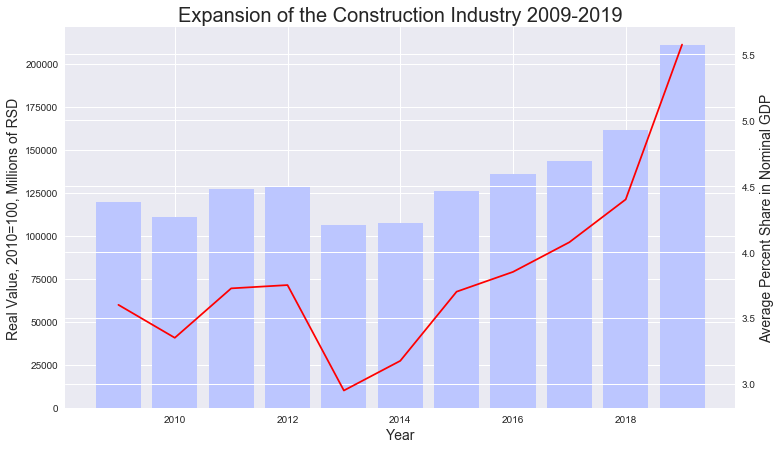

In [83]:
av_construct = qav_actions.loc[qav_actions['Action']=='F - Construction']
#We will focus on the recent "boom" years
av_construct = av_construct.loc[av_construct['Year']>2008]

const_dict = {'%NominalGDP': 'mean',
              'RealValue(mRSD,2010=100)': 'sum'}
av_construct = av_construct.groupby(['Year']).agg(const_dict)

av_construct = av_construct.reset_index()
av_construct = av_construct.rename(columns={'%NominalGDP':'Avg%NominalGDP'})

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar('Year', 'RealValue(mRSD,2010=100)', data=av_construct, color=bgcolor)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Real Value, 2010=100, Millions of RSD', fontsize=slabel)
ax.set_title('Expansion of the Construction Industry 2009-2019', fontsize=stitle)

ax1 = ax.twinx()
ax1.plot('Year', 'Avg%NominalGDP', data=av_construct, color='r')
ax1.set_ylabel('Average Percent Share in Nominal GDP', fontsize=slabel);

&emsp;Construction in Serbia, especially residential construction is only going upwards since when it hit the historical low in 2014 after a recession. The trend has all the necessary conditions to keep these levels and grow even more. Per __Dejan Krajinović, Beobuild Core D.O.O, EECFA Serbia__:<br><br>
&emsp;_"The situation on the market has been brewing for some time, with strong investor confidence as well as very favorable financial conditions fueling expansion."_<br><br>
&emsp;The Serbian construction boom is headlined by a huge Abu Dhabi-based investment in the Belgrade Waterfront project, which is well under its way.
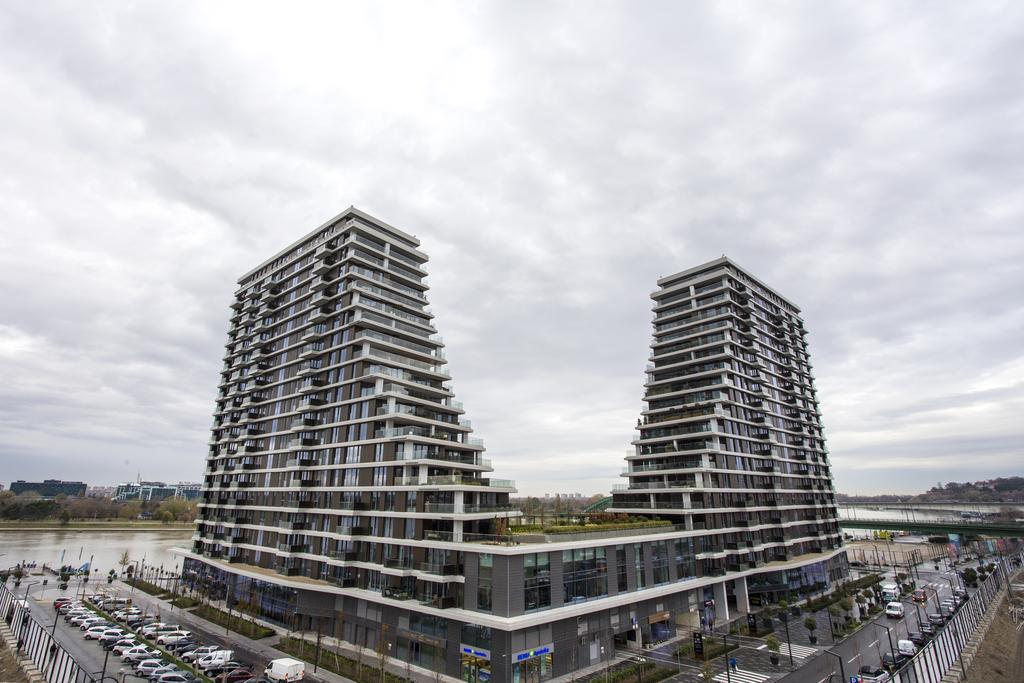<br>
_Belgrade Waterfront Residance_ - 1 of 3 finished buildings within the Waterfront project

## Business Sector, Transport and Trade
### Production Activity Indices by Sector Purpose

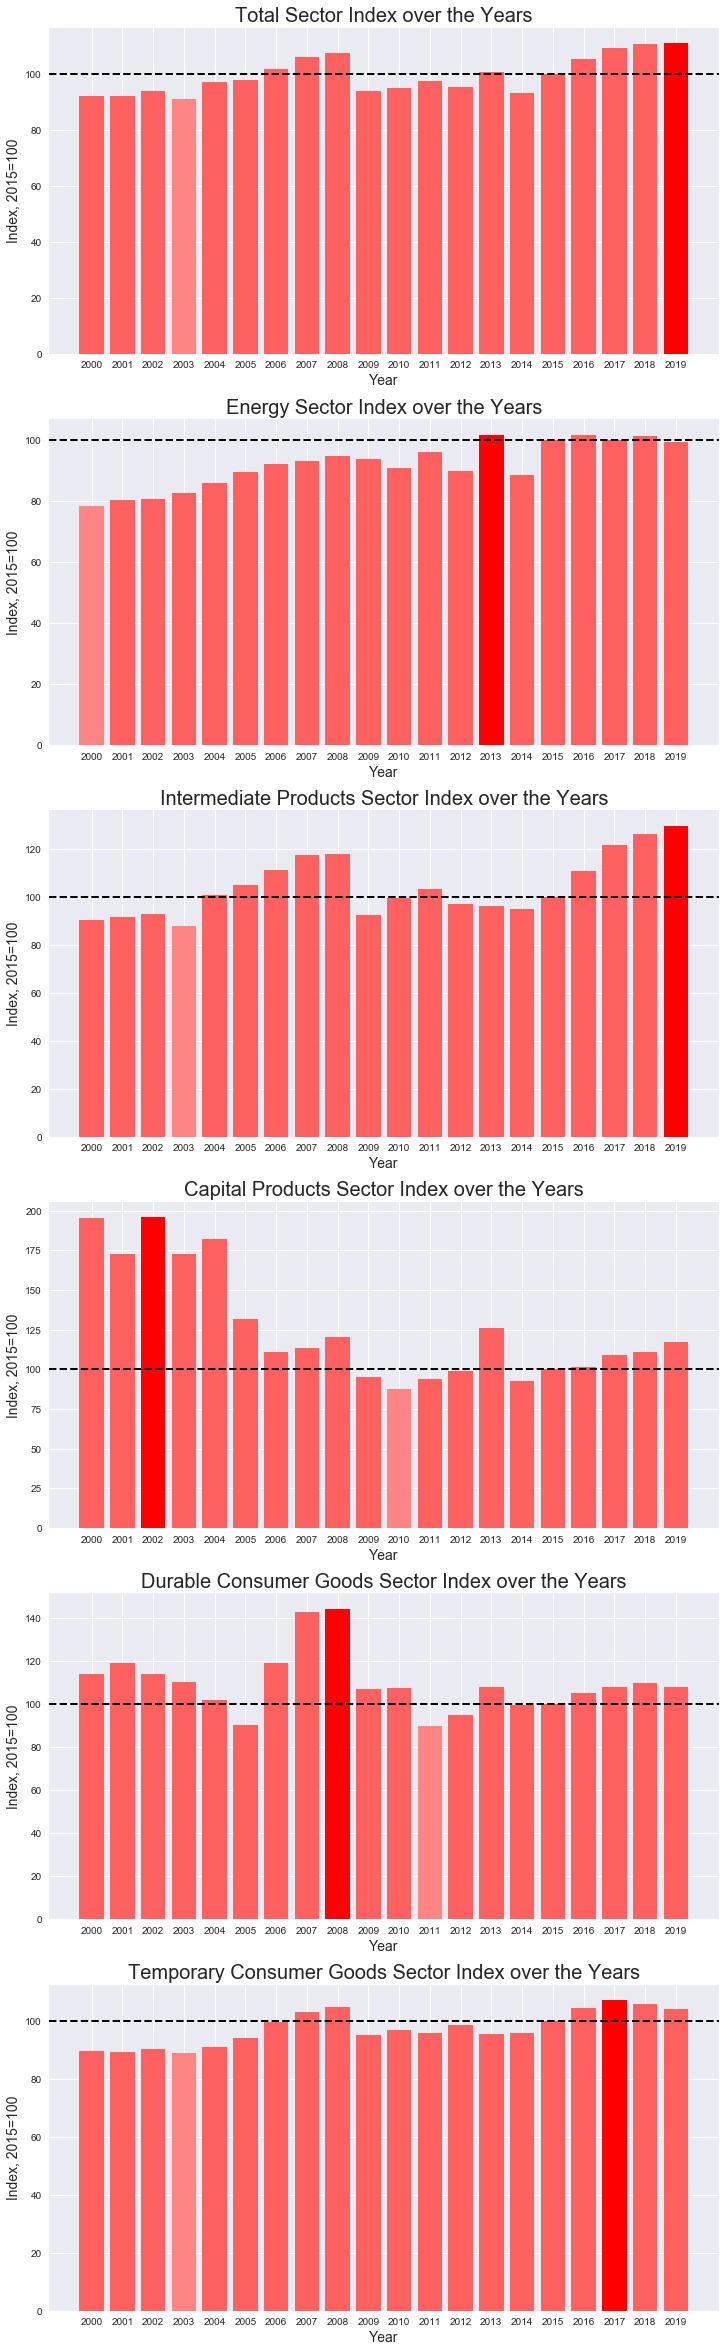

In [84]:
yi_sector = pd.read_csv('yearly_industry_sector.csv')

fig, ax = plt.subplots(6, 1, figsize=(12, 42))
ax = ax.flatten()

for idx, sector in enumerate(yi_sector['SectorPurpose'].unique()):
    curr_data = yi_sector.loc[yi_sector['SectorPurpose']==sector]
    curr_data['Year'] = curr_data['Year'].astype('str')
    curr_data = curr_data.reset_index(drop=True)
    
    minn = curr_data['ProductionIndex(2015=100)'].argmin()
    maxx = curr_data['ProductionIndex(2015=100)'].argmax()
    low = curr_data.iloc[minn]
    high = curr_data.iloc[maxx]
    
    ax[idx].bar('Year', 'ProductionIndex(2015=100)', data=curr_data, color=d2color)
    ax[idx].axhline(100, linestyle='--', color='k', linewidth=2)
    ax[idx].set_xlabel('Year' ,fontsize=slabel)
    ax[idx].set_ylabel('Index, 2015=100' ,fontsize=slabel)
    ax[idx].set_title(f'{sector} Sector Index over the Years' ,fontsize=stitle)
    
    ax[idx].bar('Year', 'ProductionIndex(2015=100)', data=low, color=sbg2color)
    ax[idx].bar('Year', 'ProductionIndex(2015=100)', data=high, color='r')

&emsp;This dataframe contains a lot of information about different industries based on their sector of production so I am going to analyze them 1 by 1 for the most part.<br>
&emsp;We can see that the __Total Industry Index__ is rising and it hit its peak in 2019 (which it is not probably going to sustain for long because of the ongoing pandemic crisis in the world right now). We can also clearly see the impact of other crises, most notably the period from 2009-2014 - The Great Recession, Serbian Recession in 2012 and Southeast Europe floods.<br>
&emsp;On the other side, I couldn't find the cause of the sudden bump in the __Energy Sector__ Activity/Production so I don't have any explanation for its apex in 2013.<br><br>
&emsp;The __Intermediate Products Secctor__ tells a very interesting story. First, it resembles the Total Industry Index a lot which would imply that it makes a good portion of it. That further tells us that Serbia as a country focuses on making goods and getting revenue from the sources that are less scarce than capital goods for example. We can see the __Capital Goods Indices__ plunder from year to year meaning that Serbian intellectual property is quite poor. We will explore the topic of R&D and Intellectual Property later in this notebook. Second, the low scarcity of the resources that this country produces mean less revenue and thus, a lower standard of living and wages, that is also a problem that we will explore late on.<br>
&emsp;__Durable Consumer Goods__ have an interesting rise and peak from 2005 till the recession in 2008. Similarly, as with the Energy industry, I will explore that in later datasets.<br>
&emsp;Lastly, __Temporary Consumer Goods__ look also similar to the Total Production Index but they oscillate a lot less. I am also going to explore that more later on.<br>
#### Conclusion
&emsp;We can see that we got a good, all-around look at the Serbian industry activity with the index data but it is not nearly enough to get a good look. So we will explore that further.

### Value Added by Industry in the Private Sector

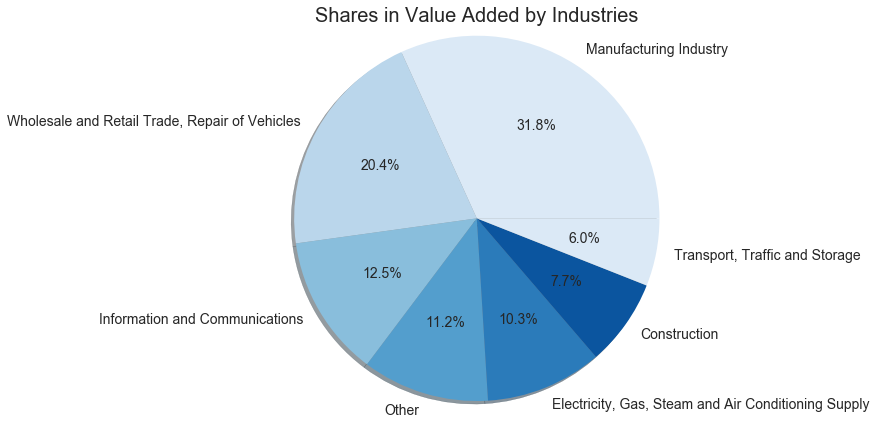

OTHERS:

Professional, Scientific and Technical Activities
Mining
Administrative and Support Services
Waterworks
Real Estate Business
Accommodation and Catering Services
Other Services


In [85]:
value_added = pd.read_csv('value_added.csv')

avg_value_added = value_added.groupby('Activity').mean().drop('Year',
                  axis=1).sort_values('NetValueAdded(mRSD)',
                  ascending=False).reset_index()

dummie = avg_value_added.copy()
dummie['Activity'] = np.where(dummie['NetValueAdded(mRSD)']/dummie.iloc[0, 3]>0.05,
                              dummie['Activity'], 'Other')
#Grouping "Other"
dummie = dummie.groupby('Activity').sum().sort_values('NetValueAdded(mRSD)',
         ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(12,7))
ax.pie(dummie['NetValueAdded(mRSD)'][1:], autopct='%1.1f%%', shadow=True,
       labels=dummie['Activity'][1:], textprops={'fontsize':slabel}, radius=1.2)
ax.set_title('Shares in Value Added by Industries', fontsize=stitle)
plt.show()

print('OTHERS:\n')
for i in [i for i in avg_value_added['Activity'].unique() if i not in dummie['Activity'].unique()]:
    print(i)

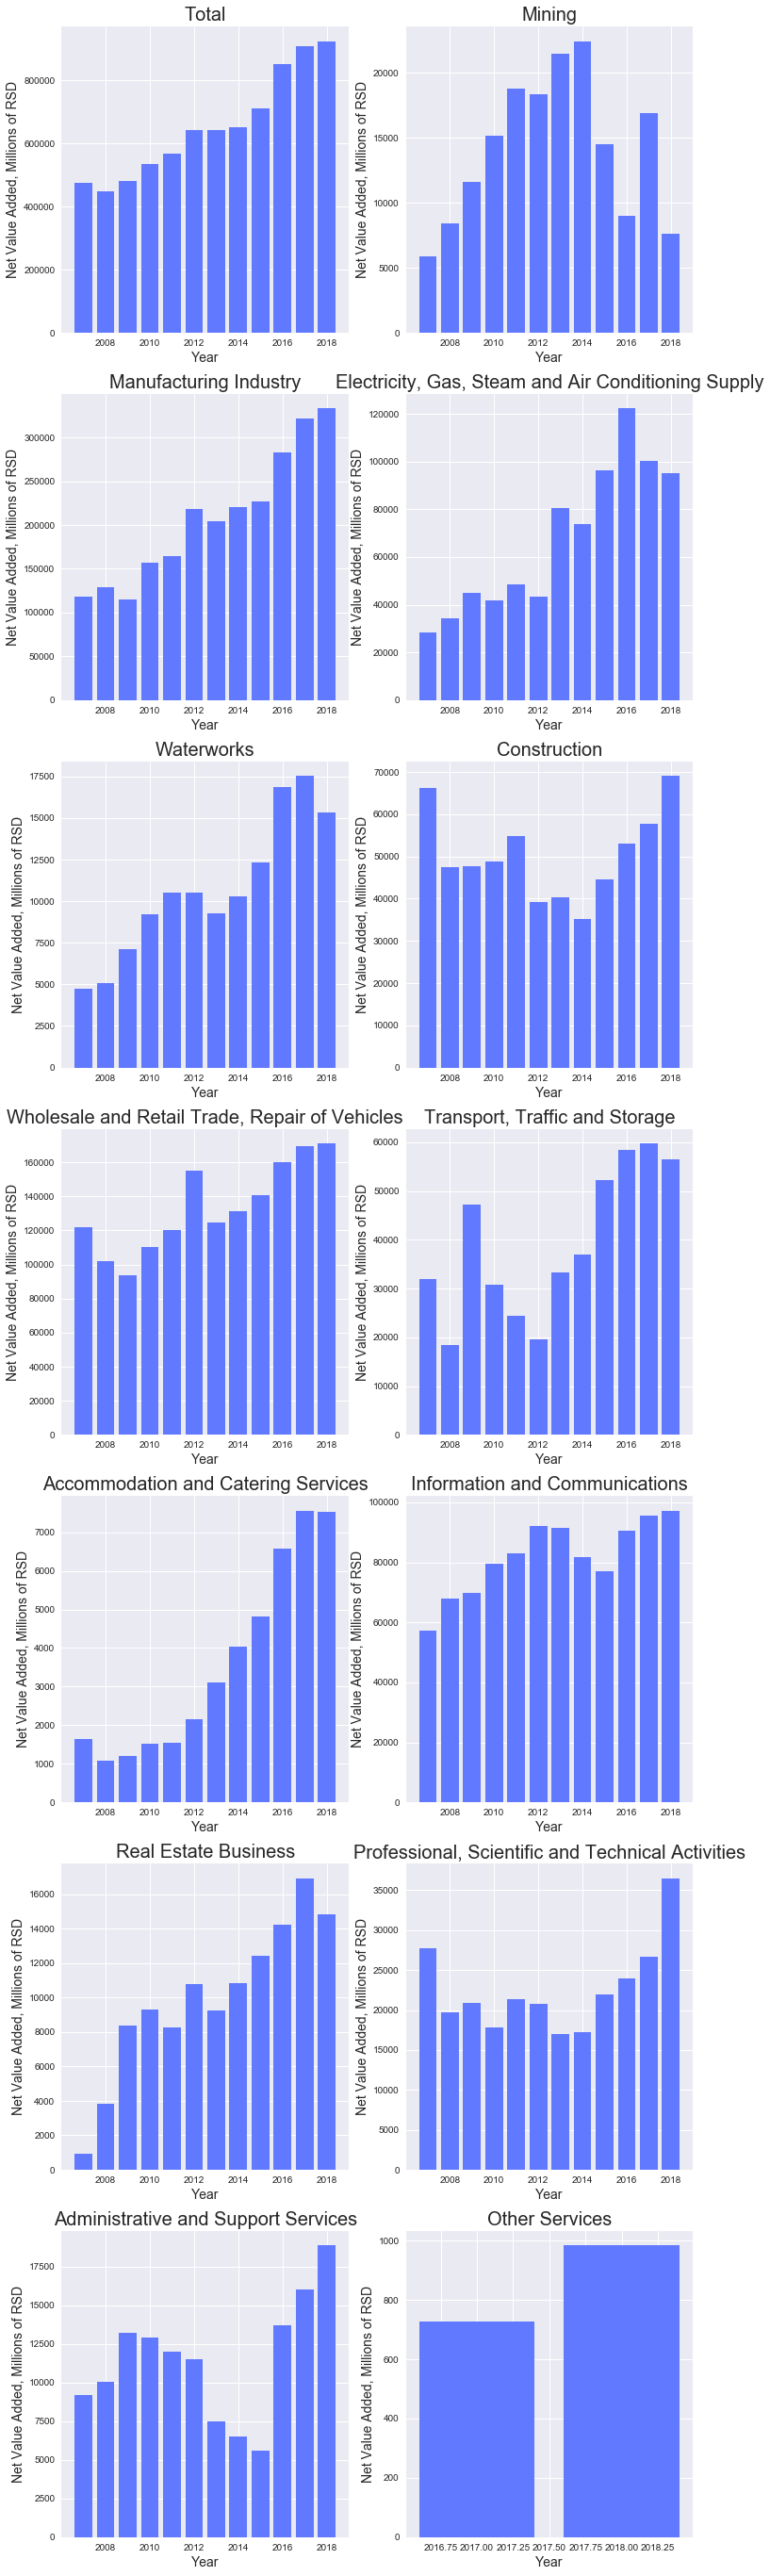

In [86]:
fig, ax = plt.subplots(7, 2, figsize=(12, 49))
ax = ax.flatten()

for idx, act in enumerate(value_added['Activity'].unique()):
    curr_data = value_added.loc[value_added['Activity']==act]

    ax[idx].bar('Year', 'NetValueAdded(mRSD)', data=curr_data, color=dcolor)
    ax[idx].set_title(act, fontsize=stitle)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('Net Value Added, Millions of RSD', fontsize=slabel)

&emsp;As I mentioned in the Glossary of this project, the data is quite incomplete and right now, it is starting to take its toll. __Other Services__ have been recorded only for the 2017 and 2018 which makes them useless to derive any assumptions from. The other problem is that these values are nominal, which makes it quite difficult to deduce if the industry is growing, the other way around is still straight forward.<br>
&emsp;Since Serbia is a relatively young country and again, the data is inconsistent, the recession years are making it difficult to give an assumption or a hypothesis in that period (2008-2014). Normally it wouldn't pose any problem but as we see, most of the data is in that period +/- several years before and after. This is another very important note to keep in mind while going through this notebook or interacting with this data.

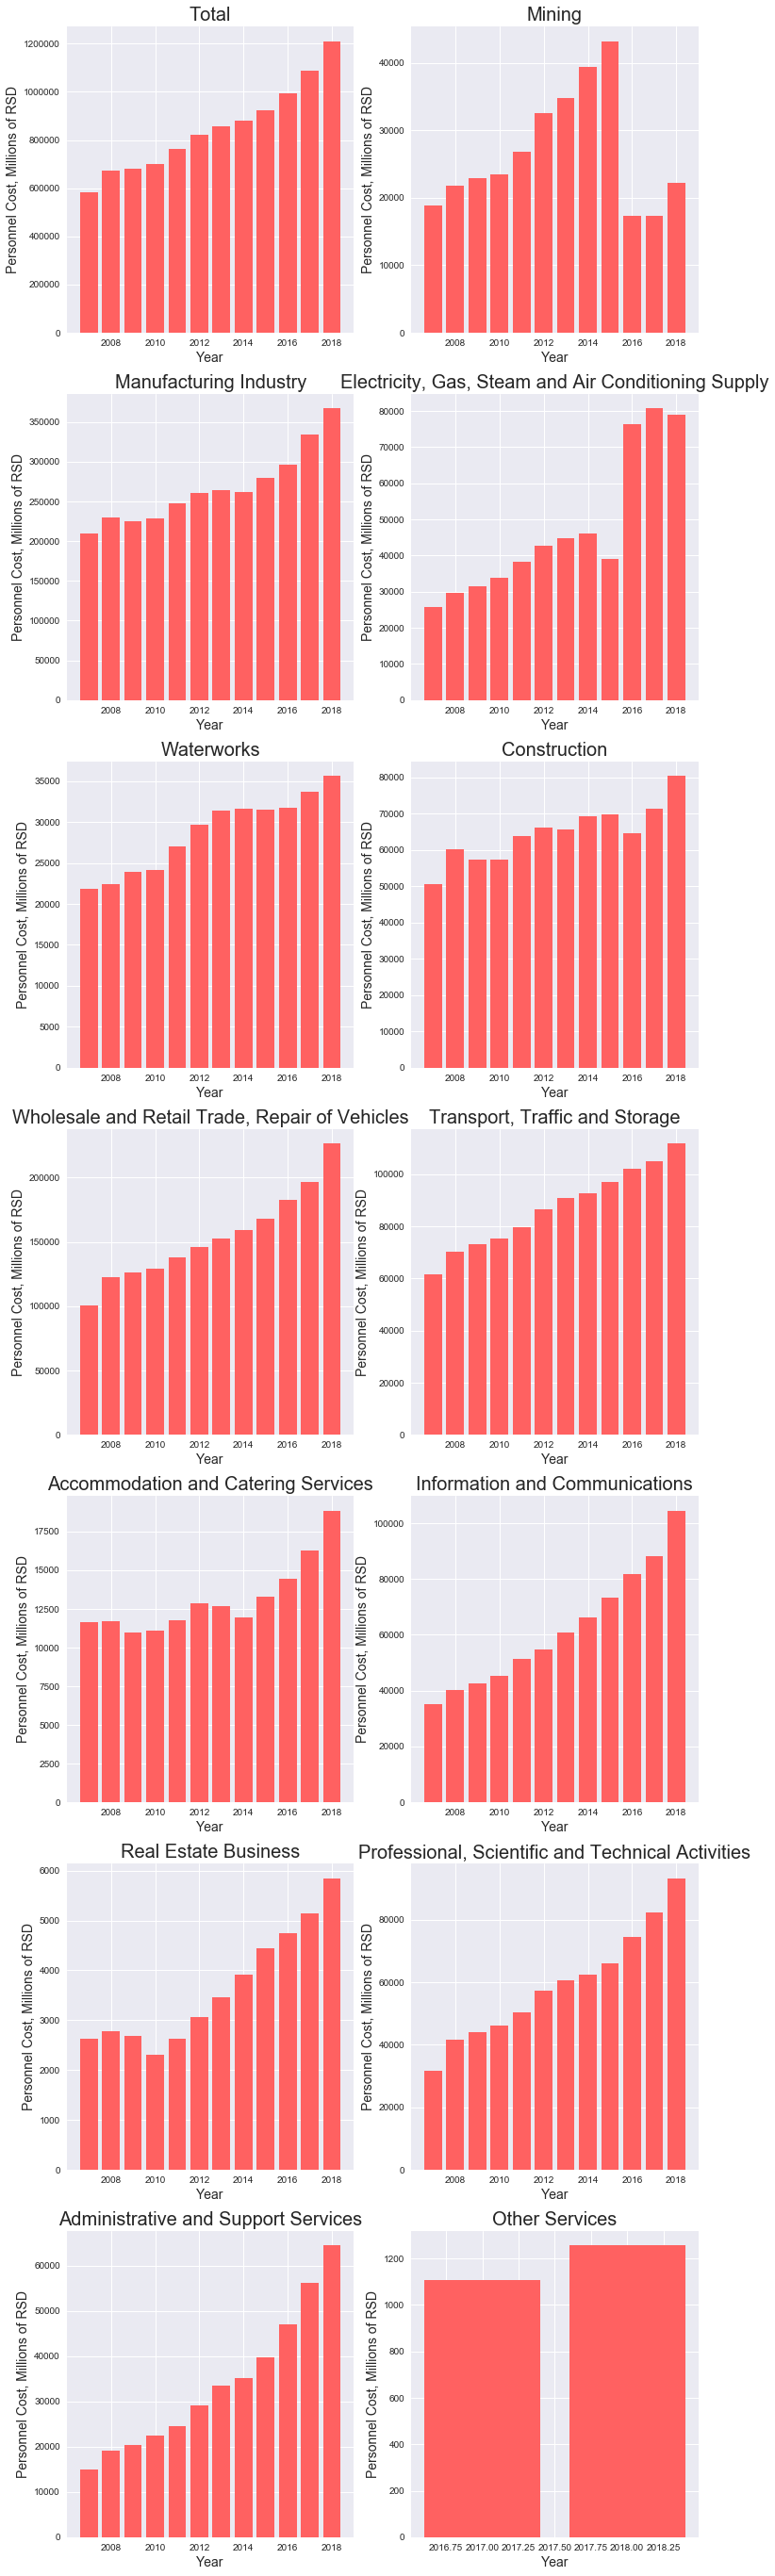

In [87]:
fig, ax = plt.subplots(7, 2, figsize=(12, 49))
ax = ax.flatten()

for idx, act in enumerate(value_added['Activity'].unique()):
    curr_data = value_added.loc[value_added['Activity']==act]

    ax[idx].bar('Year', 'Amount(mRSD)PersonnelCost', data=curr_data, color=d2color)
    ax[idx].set_title(act, fontsize=stitle)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('Personnel Cost, Millions of RSD', fontsize=slabel)

&emsp;I have to say that till now, I assumed that this data was nominal but now, my assumptions are proven to be correct. Mostly we can see the steady inflationary growth of the Personnel Price in every industry (+ a recession effect here and there) but two activities stand out.<br>
&emsp;At the end of 2015, the country's parliament adopted the "New Mining Law", with the intention to reform the previous mining law but also to encourage foreign investments in the __Mining Sector__. The above-mentioned law also heavily impacted the __Electricity, Gas, Steam and Air Conditioning Supply Industry__ as we can see on the barplot. <br><br>
&emsp;If we go back up to the net value added by year, we can see that this law hurt the industry which made it even worse. I tried to find something that would explain this behavior but barely anything came up. Even though there is some news lingering about China's 200 million Euro investment, this subject is still under addressed and needs a lot more attention, especially given this country's extraordinary mining potential.
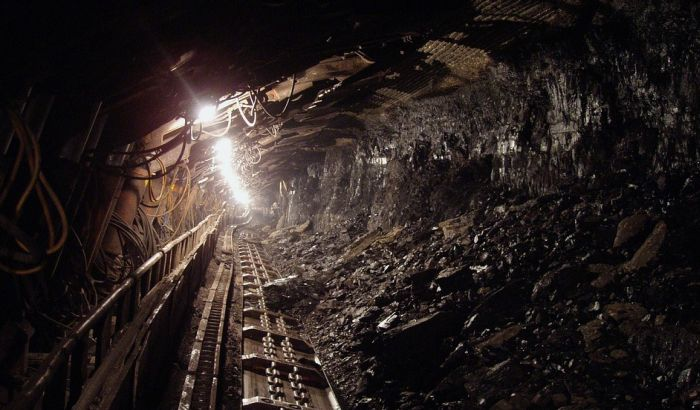<br>
_Resavica Mine_ - In an undergoing closure process

### Passengers and Goods
Before we go into the Trading Sector, I would like to explore the Transport first, as they are, among other things, an essential part of Trading. We will also return to the Business Sector several times within the notebook.

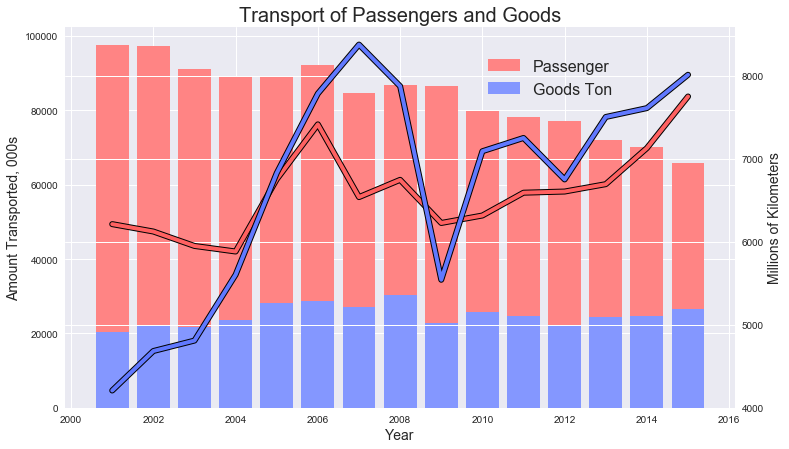

In [88]:
pg = pd.read_csv('passengers_and_goods.csv')
pg = pg.sort_values('Year').reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar('Year', 'Value', data=pg.loc[pg['Metric']=='Passengers Carried (Thousands)'],
        color=sbg2color, label='Passenger')
ax.bar('Year', 'Value', data=pg.loc[pg['Metric']=='Goods Transported (Tons)'],
        color=sbgcolor, label='Goods Ton')
ax.set_title('Transport of Passengers and Goods', fontsize=stitle)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Amount Transported, 000s', fontsize=slabel)

ax.legend(bbox_to_anchor=(0.61,0.78) , prop={'size':16})

ax1 = ax.twinx()
ax1.plot('Year', 'Value', data=pg.loc[pg['Metric']=='Passenger Kilometers (Millions)'],
        color='k', linewidth=6)
ax1.plot('Year', 'Value', data=pg.loc[pg['Metric']=='Passenger Kilometers (Millions)'],
        color=d2color, linewidth=4)

ax1.plot('Year', 'Value', data=pg.loc[pg['Metric']=='Ton Kilometers (Millions)'],
        color='k', linewidth=6)
ax1.plot('Year', 'Value', data=pg.loc[pg['Metric']=='Ton Kilometers (Millions)'],
        color=dcolor, linewidth=4)
ax1.set_ylabel('Millions of Kilometers', fontsize=slabel);

&emsp;I know this graph is a bit messy but I wanted it to be compact. Things are, like with the previous plots, more or less clear. The recession valley can be seen in Millions of Kilometers traveled, especially in Passenger Kilometers since it is more consistent there, but it is more severe in Goods Tonne-kilometers. Tons of goods transported oscillate but there seems to be a constant fall in the amount of passengers transported.<br>
&emsp;That could be for various reasons since we already established that Serbia is not the richest economy out there. The most infamous case related to transport is the Serbian railways which are known to be quite undeveloped, even going back with development and the trains are one of the slowest on the continent.
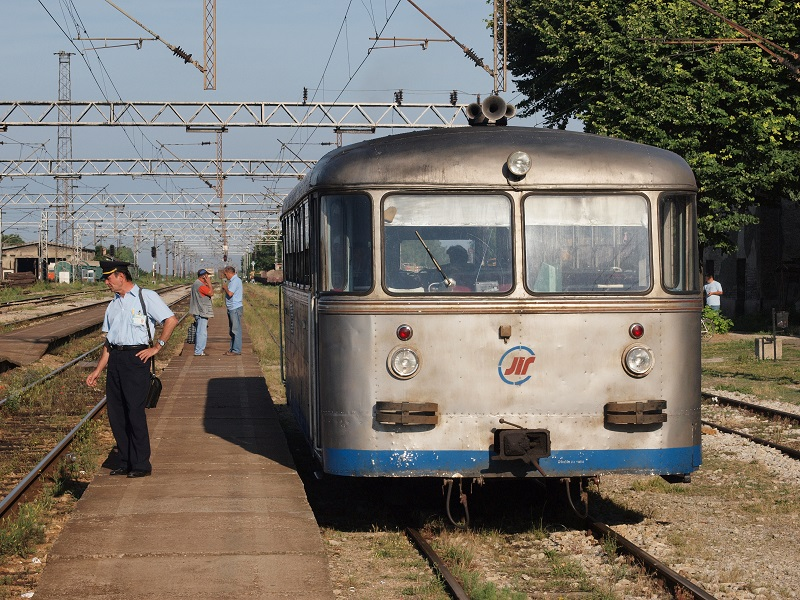

### Net Trade by Country and Sector

In [89]:
net_sector = pd.read_csv('net_sector.csv')

net_trade = net_sector.loc[net_sector['CountryId']=='Total'].groupby(
            'Year').sum().reset_index()
net_trade['Imports(tUSD)'] = net_trade['Imports(tUSD)']*-1

total_trade = net_sector.loc[net_sector['CountryId']=='Total']
total_trade['Imports(tUSD)'] = total_trade['Imports(tUSD)']*-1

avg_trade = net_sector.groupby(['CountryId', 'Sector']).mean().reset_index()

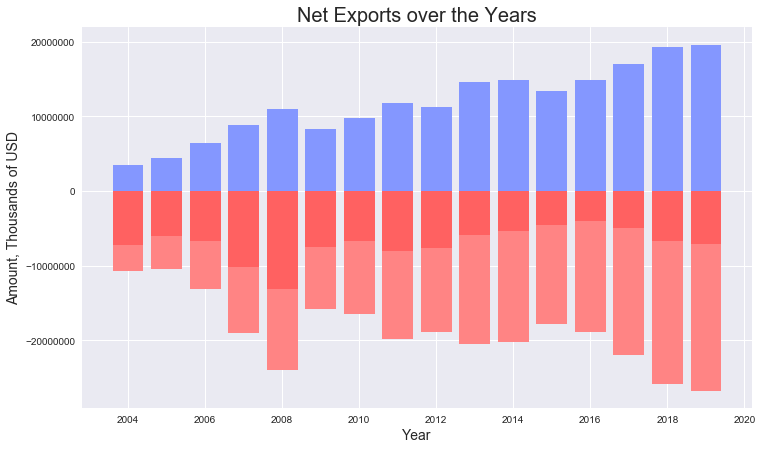

In [90]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.bar('Year', 'Imports(tUSD)', data=net_trade, color=sbg2color)
ax.bar('Year', 'Exports(tUSD)', data=net_trade, color=sbgcolor)
ax.bar('Year', 'NetExports(tUSD)', data=net_trade, color=d2color)

ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Amount, Thousands of USD', fontsize=slabel)
ax.set_title('Net Exports over the Years', fontsize=stitle)
ax.ticklabel_format(style = 'plain')

&emsp;Here we can see that the initial hypothesis that we started with, that Serbia is an ineffective economy, is fully exposed. The state of its negative exports is present over a longer period which means that its domestic production is terribly choking and needs some thorough reforms. We can also confirm another thing, the country was experiencing positive economic activity in the years prior to 2008 which was stopped due to the Great Recession. This explains the rise in Energy and Durable Consumer Products Industries Indices.

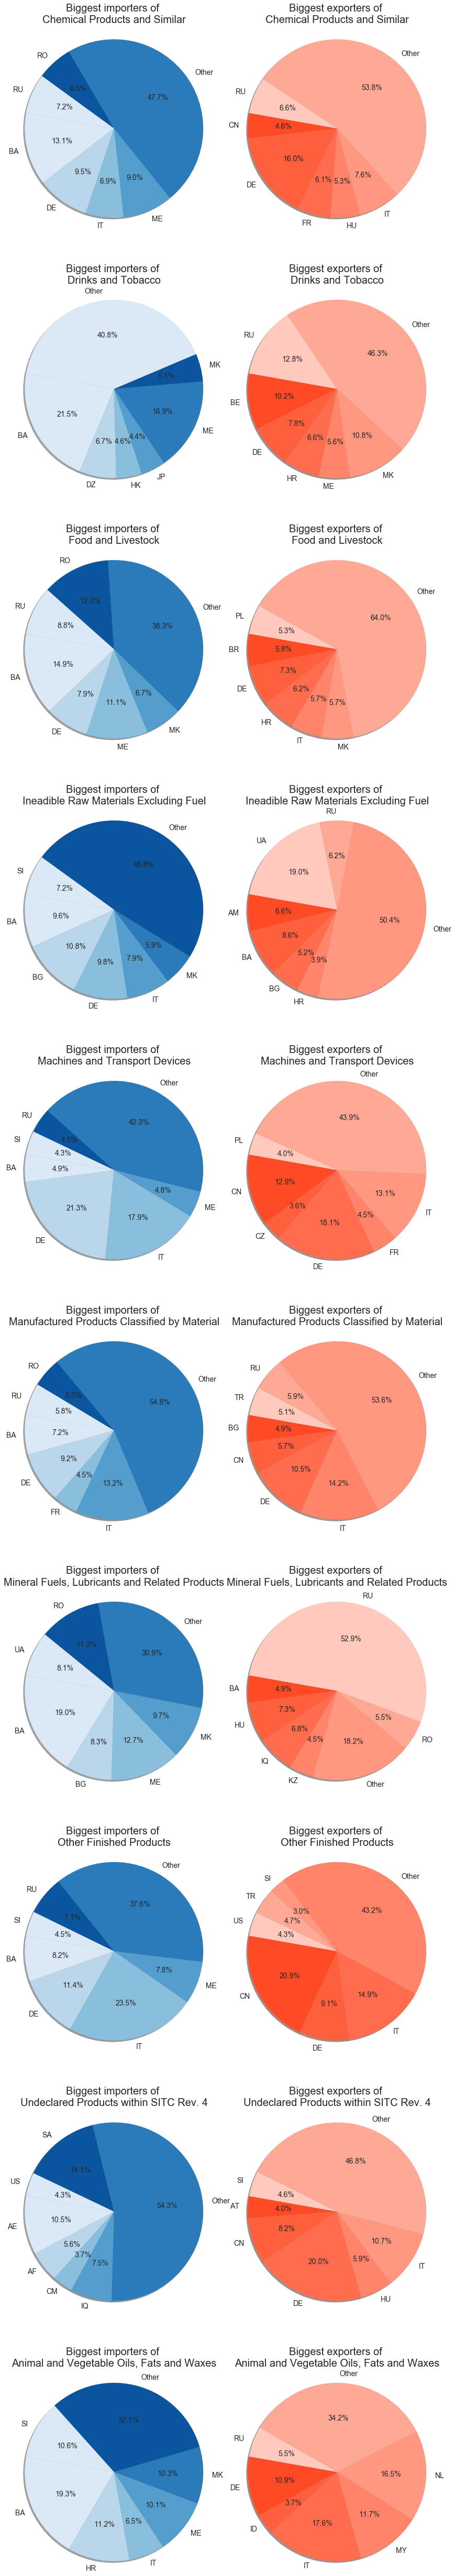

In [91]:
misc = ['Total', 'CEFTA', 'EU']
colors = ['#FF4B25', '#FE603E', '#FF6D4E', '#FF8469', '#FF9781', '#FEA996','#FFC9BD']

fig, ax = plt.subplots(10, 2, figsize=(14, 90))
ax = ax.flatten()

for idx, sector in enumerate(avg_trade['Sector'].unique()):
    idx1 = idx*2
    idx2 = idx1+1
    
    curr_data = avg_trade.loc[avg_trade['Sector']==sector]
    curr_data = curr_data.loc[~curr_data['CountryId'].isin(misc)]
    
    #Exports/Countries that are importing
    importers = curr_data.sort_values('Exports(tUSD)', 
    ascending=False).iloc[:6]['CountryId'].tolist()
    curr_data_ex = curr_data[['CountryId', 'Exports(tUSD)']]
    curr_data_ex['CountryId'] = np.where(curr_data_ex['CountryId'].isin(importers),
                                         curr_data_ex['CountryId'], 'Other')
    curr_data_ex = curr_data_ex.groupby(['CountryId']).sum().reset_index()
    
    ax[idx1].pie(curr_data_ex['Exports(tUSD)'], radius=1.2, shadow=True,
                labels=curr_data_ex['CountryId'], autopct='%1.1f%%', 
                textprops={'fontsize':slabel}, startangle=170)
    title1 = ax[idx1].set_title('Biggest importers of \n'+sector, fontsize=stitle)
    title1.set_position([0.5, 1.05])
    
    #Imports/Countries that are exporting
    exporters = curr_data.sort_values('Imports(tUSD)', 
    ascending=False).iloc[:6]['CountryId'].tolist()
    curr_data_im = curr_data[['CountryId', 'Imports(tUSD)']]
    curr_data_im['CountryId'] = np.where(curr_data['CountryId'].isin(exporters),
                                         curr_data['CountryId'], 'Other')
    curr_data_im = curr_data_im.groupby(['CountryId']).sum().reset_index()

    ax[idx2].pie(curr_data_im['Imports(tUSD)'], radius=1.2, shadow=True,
                labels=curr_data_im['CountryId'], autopct='%1.1f%%', 
                textprops={'fontsize':slabel}, startangle=170, colors=colors)
    title2 = ax[idx2].set_title('Biggest exporters of \n'+sector, fontsize=stitle)
    title2.set_position([0.5, 1.05])

&emsp;Here are Serbia's overall trading partners with average Imports and Exports values based on their share in trading.<br><br>
&emsp;Most of the country's trading is done with its neighbors and Ex-Yu countries (Croatia, Bosnia & Herzegovina, Montenegro, Romania, Bulgaria, Slovenia. At the second place come EU countries, most notably Italy and Germany (and Slovenia). In the third place, there are other powerful economies that specialize in a sector, like Russia in Fuel and Lubricant exports or China and the USA with the finished product exports.

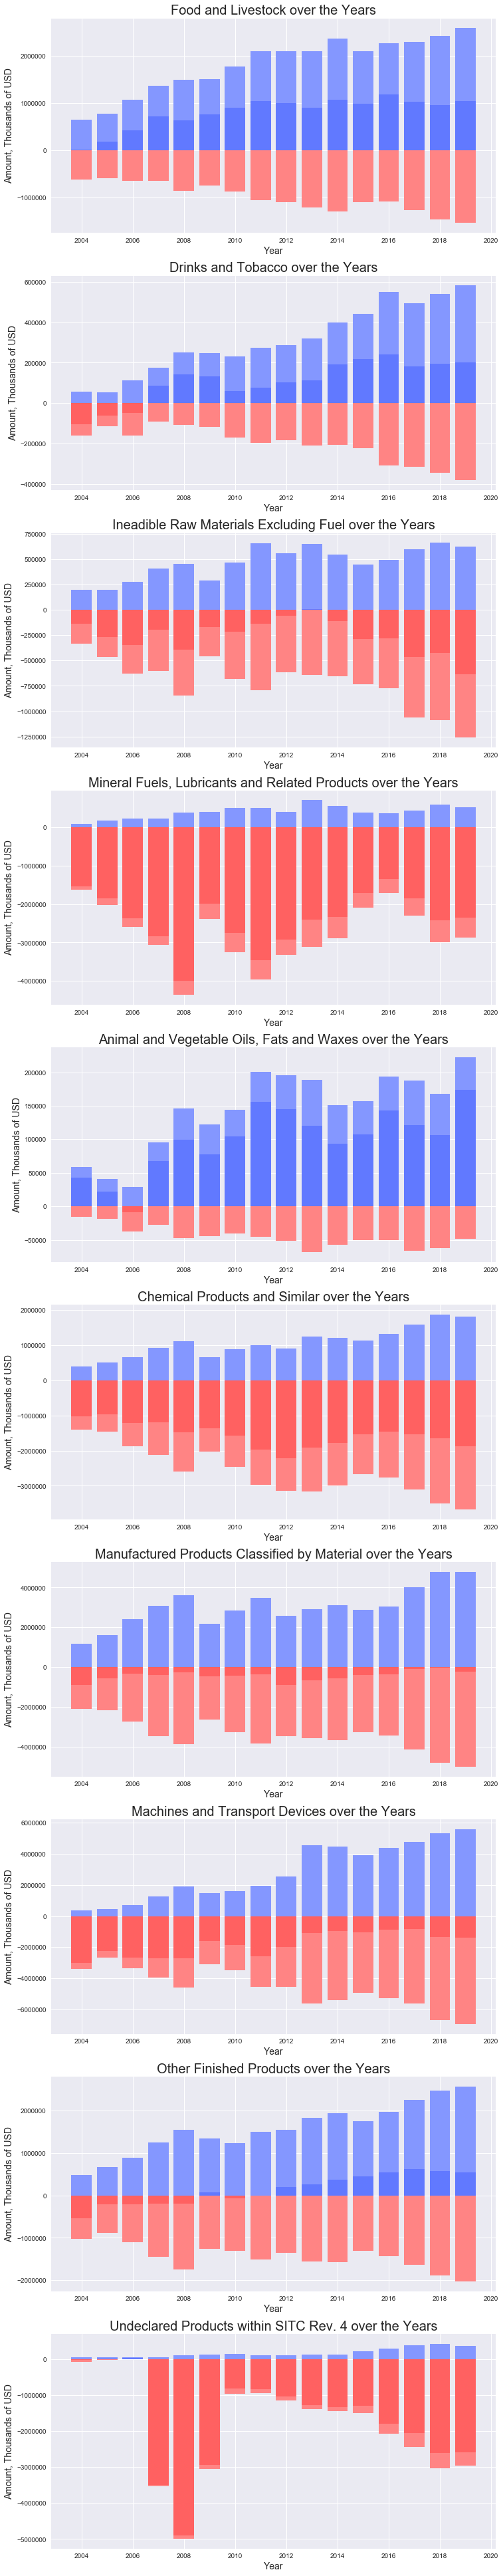

In [92]:
fig, ax = plt.subplots(10, 1, figsize=(12, 70))

for idx, sector in enumerate(total_trade['Sector'].unique()):
    curr_data = total_trade.loc[total_trade['Sector']==sector]
    
    curr_data0 = curr_data.loc[curr_data['NetExports(tUSD)']<0]
    curr_data1 = curr_data.loc[curr_data['NetExports(tUSD)']>0]
    
    ax[idx].bar('Year', 'Imports(tUSD)', data=curr_data, color=sbg2color)
    ax[idx].bar('Year', 'Exports(tUSD)', data=curr_data, color=sbgcolor)
    ax[idx].bar('Year', 'NetExports(tUSD)', data=curr_data0, color=d2color)
    ax[idx].bar('Year', 'NetExports(tUSD)', data=curr_data1, color=dcolor)

    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('Amount, Thousands of USD', fontsize=slabel)
    ax[idx].set_title(sector+' over the Years', fontsize=stitle)
    ax[idx].ticklabel_format(style = 'plain')

&emsp;As we already assumed, Serbia is an agricultural-based country since most of the income comes from that sector. Other primary sectors also have a positive Net Export trade (Fats, Oils, and Waxes for example). An interesting observation here is that __Ineadible Raw Materials__ increase in negative Net Exports compliments country's increase in positive Net Exports in __Other Finished Products__ production.<br>
&emsp;The sectors that the country struggles the most with is __Fuels and Lubricants__ and __Chemical Products__ and that is logical since the country isn't really "famous" for activity in those sectors that would usually compliment it.
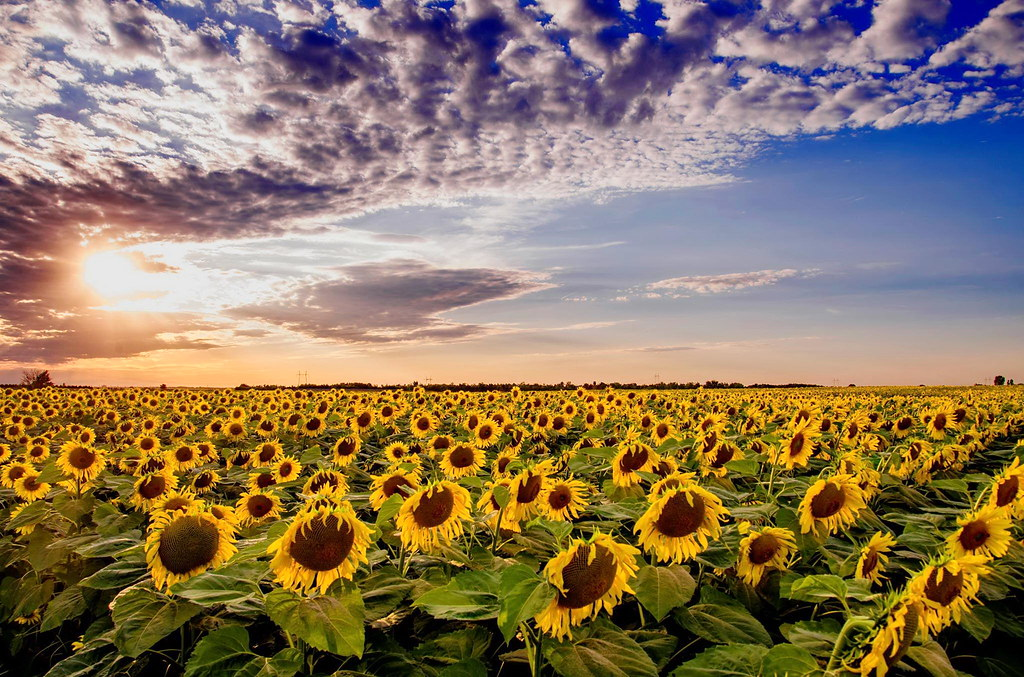<br>
_A sunflower field in the Voyvodina region_ - One of the primary factors in the well being of Serbia's Oil and Food Industries

## Job Market
NOTE: Many things in this section overlap with the Business section, as I already
said it will so keep in mind that the analysis in the Job Market section isn't
strictly Job Market-related.
### Per-employee Average Value Added

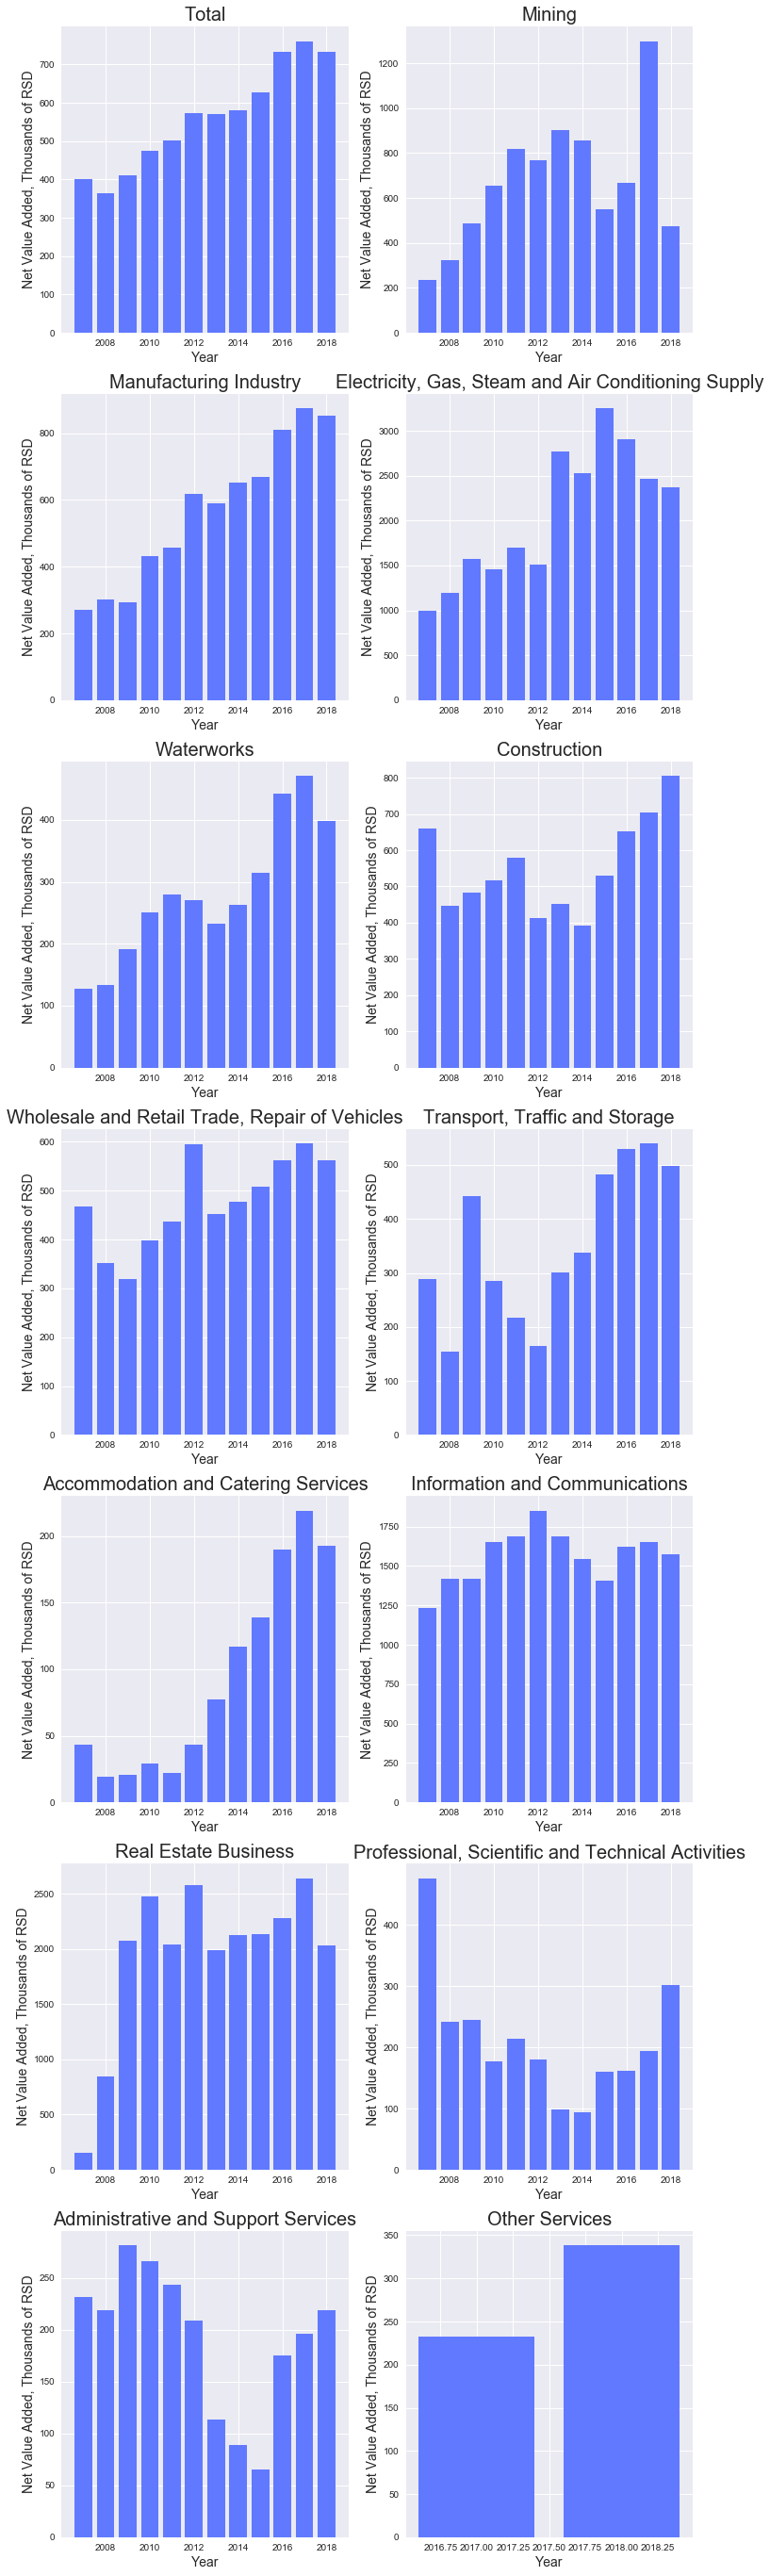

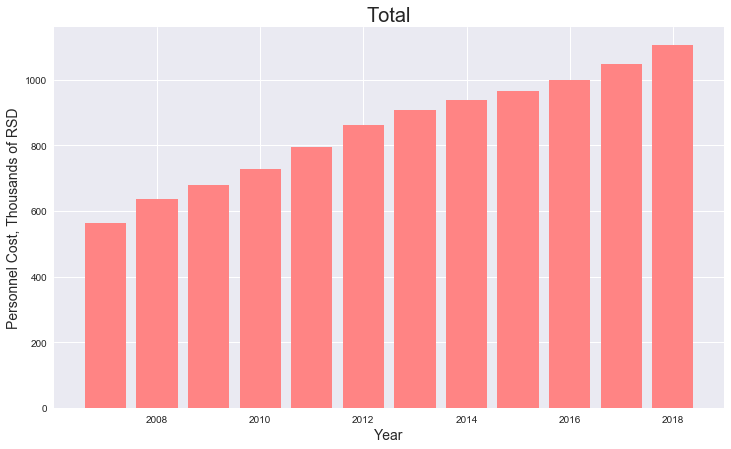

In [93]:
pea_va = pd.read_csv('pea_value_added.csv')

fig, ax = plt.subplots(7, 2, figsize=(12, 49))
ax = ax.flatten()

for idx, activity in enumerate(pea_va['Activity'].unique()):
    curr_data = pea_va.loc[pea_va['Activity']==activity]
    
    ax[idx].bar('Year', 'NetValueAdded(tRSD)', data=curr_data, color=dcolor)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('Net Value Added, Thousands of RSD', fontsize=slabel)
    ax[idx].set_title(activity, fontsize=stitle)
    
fig1, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar('Year', 'Amount(tRSD)PersonnelCost', color=sbg2color,
        data=pea_va.loc[pea_va['Activity']=='Total'])
ax1.set_xlabel('Year', fontsize=slabel)
ax1.set_ylabel('Personnel Cost, Thousands of RSD', fontsize=slabel)
ax1.set_title('Total', fontsize=stitle);

&emsp;It was not declared if the data was real or nominal so making assumptions based on the blue-colored plots alone can be mistake-prone. Plotting the __Total Average Personnel Cost over the Years__ (in the red down) makes it clear that the values are indeed, nominal. These values are after all just complementing the __Value Added per Activity__ data, as I am going to show it in the cell down.

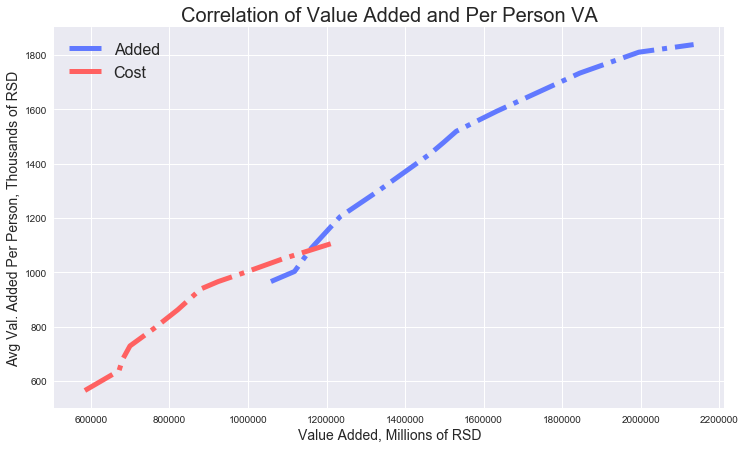

In [94]:
pea_va = pea_va.sort_values(['Year', 'Activity']).reset_index(drop=True)
value_added = value_added.sort_values(['Year', 'Activity']).reset_index(drop=True)
totals = [i.loc[i['Activity']=='Total'] for i in [value_added, pea_va]]

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(totals[0]['Amount(mRSD)ValueAdded'], 
        totals[1]['Amount(tRSD)ValueAdded'], color=dcolor, linestyle='-.',
        linewidth=5, label='Added')
ax.plot(totals[0]['Amount(mRSD)PersonnelCost'], 
        totals[1]['Amount(tRSD)PersonnelCost'], color=d2color, linestyle='-.',
        linewidth=5, label='Cost')
ax.set_xlabel('Value Added, Millions of RSD', fontsize=slabel)
ax.set_ylabel('Avg Val. Added Per Person, Thousands of RSD', fontsize=slabel)
ax.set_title('Correlation of Value Added and Per Person VA', fontsize=stitle)
ax.legend(prop={'size':16});

### Employment and Unemployment
&emsp;Another thing that the Serbian economy is known for, is its frightening unemployment rates which are hurting the standard of living.<br>
&emsp;Since unemployment rate data starts in 2014, it could potentially be biased and we don't have a clear look at the business cycles, so take the charts from __Unemployed__ and __NEET__ dataset with a grain of salt.

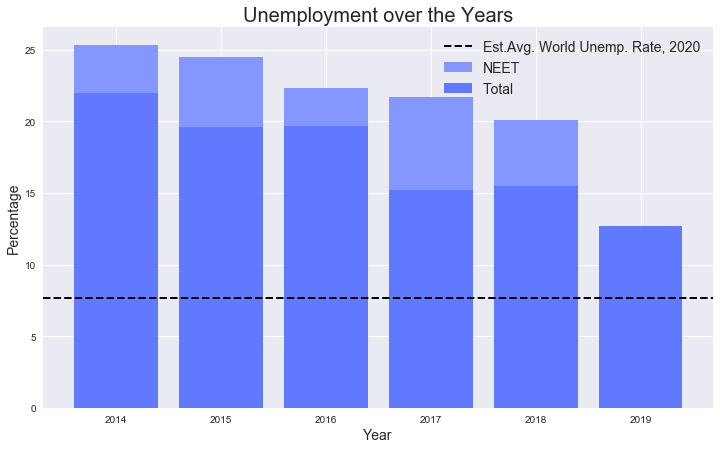

In [95]:
employees = pd.read_csv('employees.csv')
unemployed = pd.read_csv('unemployed.csv')
neet = pd.read_csv('NEET_rate.csv')

fig, ax = plt.subplots(figsize=(12, 7))
ax.bar('Year', 'PctUnemployed', data=neet, color=sbgcolor, label='NEET')
ax.bar('Year', 'PctUnemployed', color=dcolor,
       data=unemployed.loc[unemployed['Q']=='Q1'], label='Total')
ax.axhline(7.7, linestyle='--', color='k', linewidth=2, 
           label='Est.Avg. World Unemp. Rate, 2020')

ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Percentage', fontsize=slabel)
ax.set_title('Unemployment over the Years', fontsize=stitle)
ax.legend(prop={'size':14});

&emsp;It seems that the unemployment rate has been falling for the past 5 years which is a good indicator for the country's economy. Still, the year span is quite poor so I am not going to jump to any conclusions and follow the leads to see is this statement statistically significant and has a cause, or it is caused by a chance.

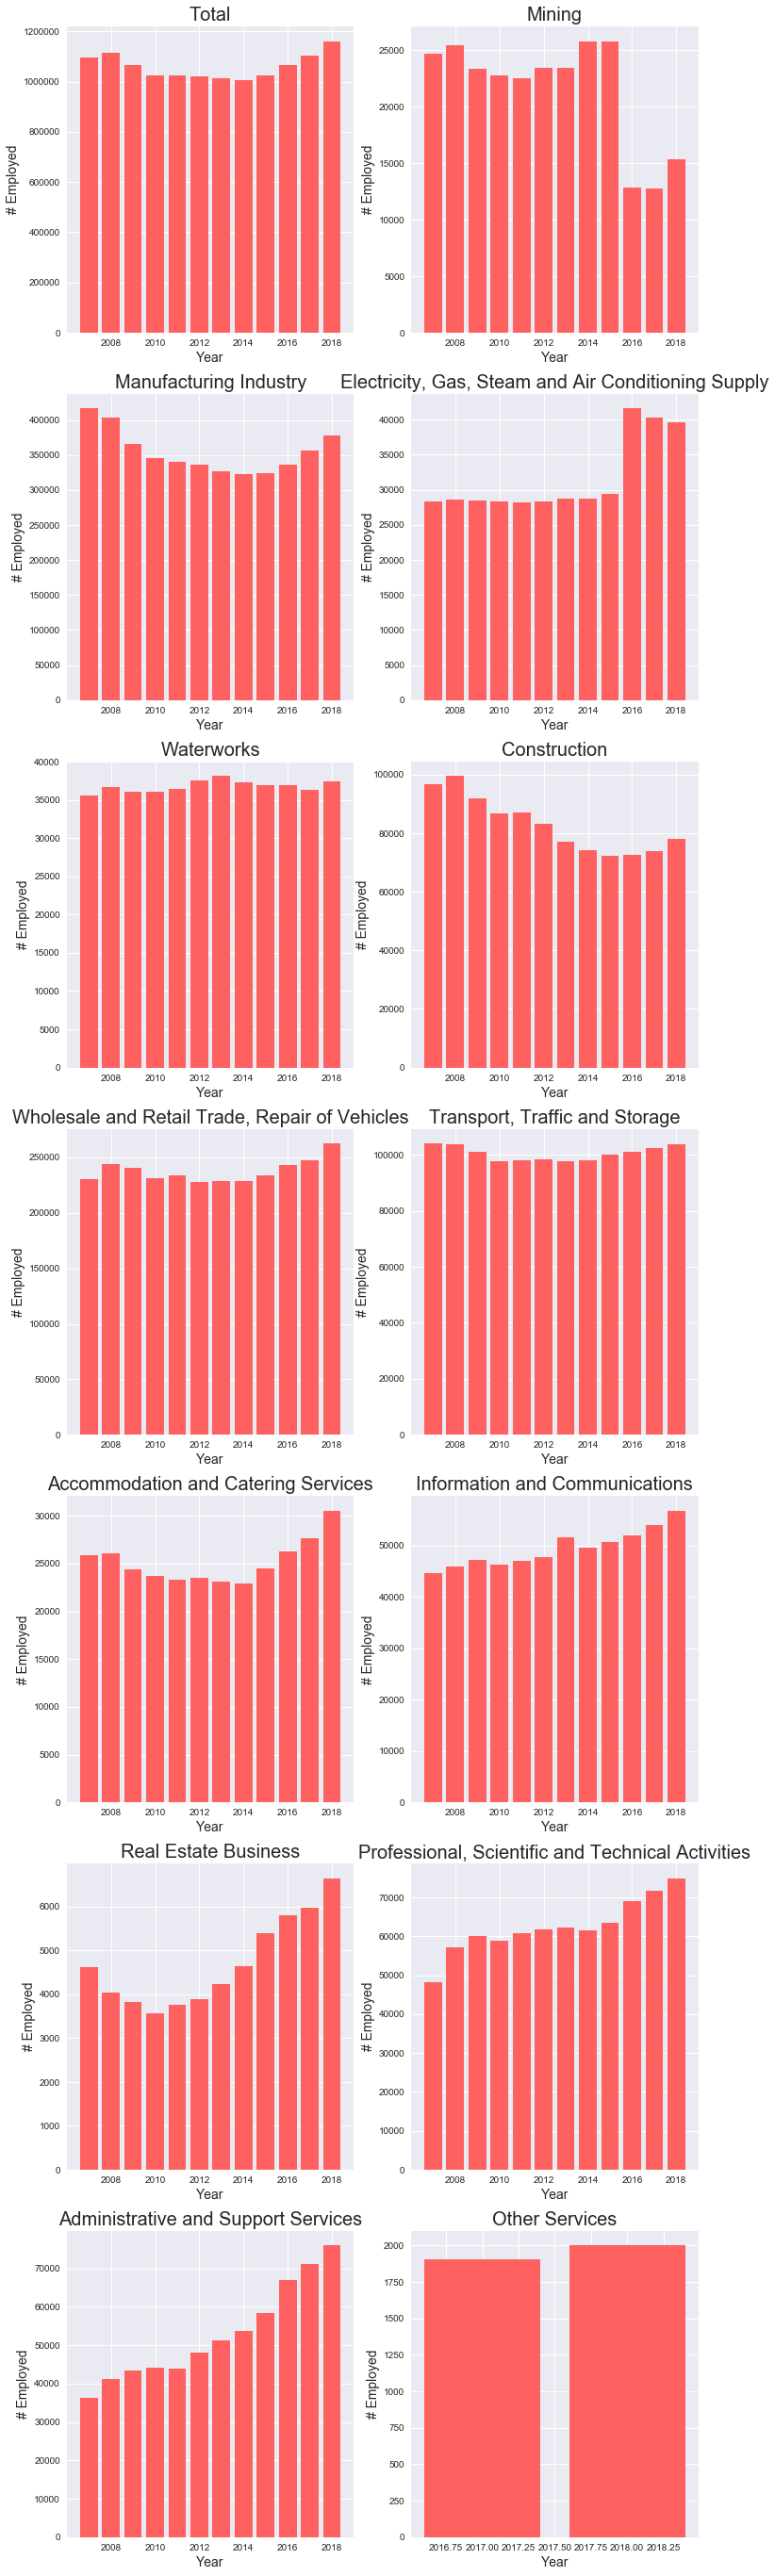

In [96]:
fig, ax = plt.subplots(7, 2, figsize=(12, 49))
ax = ax.flatten()

for idx, activity in enumerate(employees['Activity'].unique()):
    curr_data = employees.loc[employees['Activity']==activity]
    
    ax[idx].bar('Year', 'Amount', data=curr_data, color=d2color)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('# Employed', fontsize=slabel)
    ax[idx].set_title(activity, fontsize=stitle)

&emsp;I hate it when I have to repeat myself with words and especially with plots, but that is how it just goes. Mostly we can see that the country is steadily recovering from a long period of reduced economic activity and it is approaching a more prosperous period. Besides the trend rise in the __Administrative and Support Services__, 2 more observations that worth noting.<br>
&emsp;We concluded that the __Construction__ business is currently doing extremely well in Serbia, but for some reason, not many new jobs are being created and on the other side, __Real Estate Business__ employment seems to be sky-rocketing. Another thing is that I am still not able to pinpoint the cause of sudden activity changes in the __Electricity, Gas, Steam and Air Conditioning Supply__ industry. It looks like it is inversely-correlated to the __Mining__ industry but there isn't enought data yet to support that.

### Average Salaries
Since I am becoming repetative and I want to shift my focus, I am only going to examine the average salaries for the sectors/activities of interest.

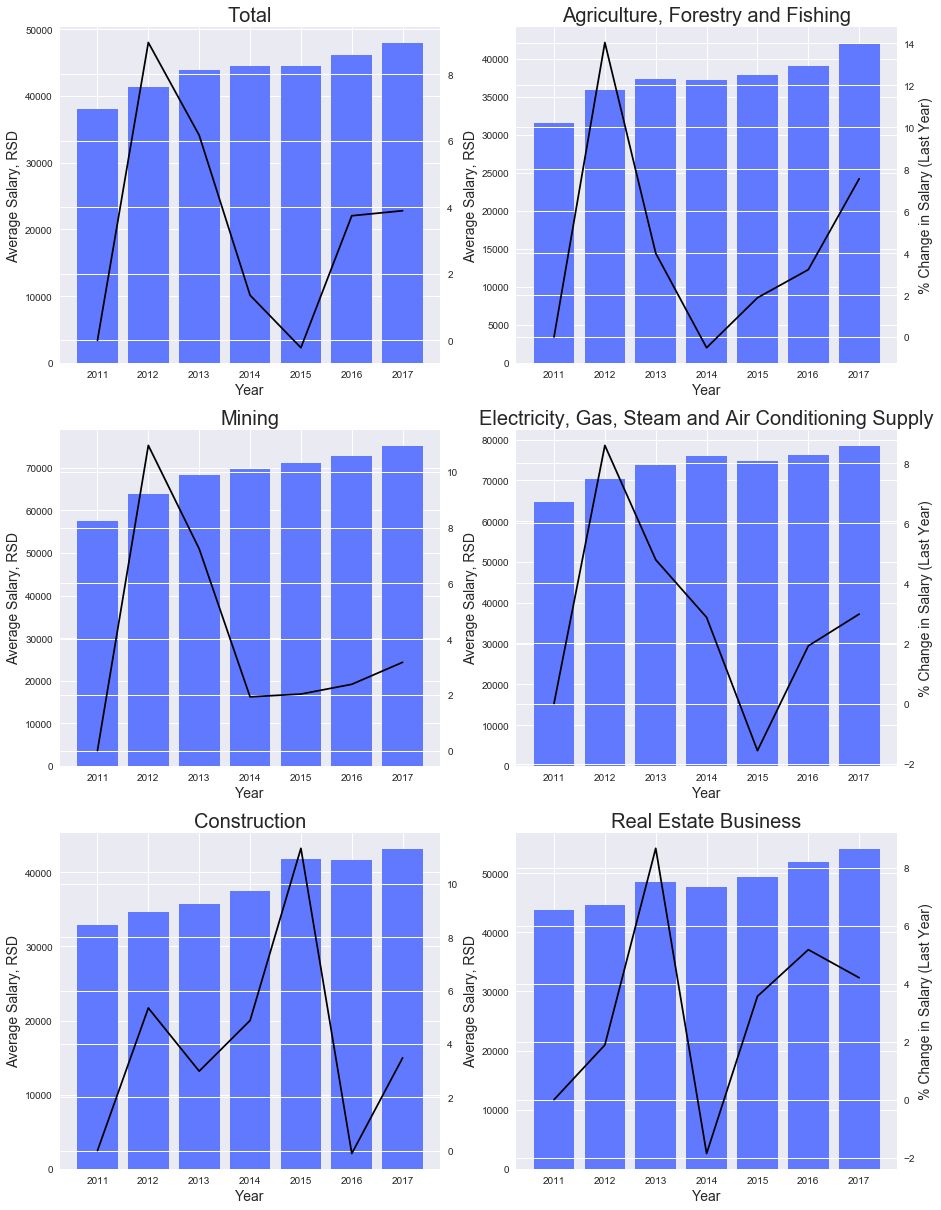

In [97]:
avg_salaries = pd.read_csv('average_salaries.csv')

sectors = ['Total', 'Agriculture, Forestry and Fishing', 'Mining',
           'Electricity, Gas, Steam and Air Conditioning Supply',
           'Construction', 'Real Estate Business']
avg_salaries = avg_salaries.loc[avg_salaries['Sector'].isin(sectors)]
avg_salaries = avg_salaries.reset_index(drop=True)

#% Increase with respecto to the last year
salaries = []    
for sector in sectors:
    curr_data = avg_salaries.loc[avg_salaries['Sector']==sector]
    
    curr_data['PrevYr'] = curr_data['Amount(RSD)'].shift(1).fillna(0)
    curr_data['%Increase'] = round((100*curr_data['Amount(RSD)'])/curr_data['PrevYr']-100, 2)
    curr_data = curr_data.drop('PrevYr', axis=1)
    
    salaries.append(curr_data)

avg_salaries = pd.concat(salaries)
avg_salaries.loc[avg_salaries['%Increase']>99999, '%Increase'] = 0


fig, ax = plt.subplots(3, 2, figsize=(15, 21))
ax = ax.flatten()

for idx, sector in enumerate(sectors):
    curr_data = avg_salaries.loc[avg_salaries['Sector']==sector]
    
    ax[idx].bar('Year', 'Amount(RSD)', data=curr_data, color=dcolor)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    ax[idx].set_ylabel('Average Salary, RSD', fontsize=slabel)
    ax[idx].set_title(sector, fontsize=stitle)
    
    axx = ax[idx].twinx()
    axx.plot('Year', '%Increase', data=curr_data, color='k')
    if idx%2==1:
        axx.set_ylabel('% Change in Salary (Last Year)', fontsize=slabel)

&emsp;This is somehow disappointing. I expected at least one sector in __Average Salaries__ to complement our previous hypotheses, but that is not the case. The only thing that came to mind, after I went through some articles about Serbian salaries, are some jokes about the Serbian president and his pay raise promises.

## Population and Standard of Living
Even though per-employee added value and salaries are tightly related to the standard of living, we are first going to take a look at the population and populational structure.
### Population

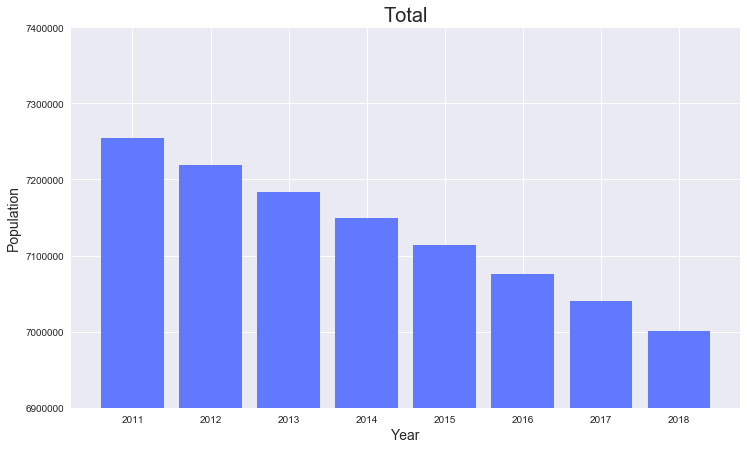

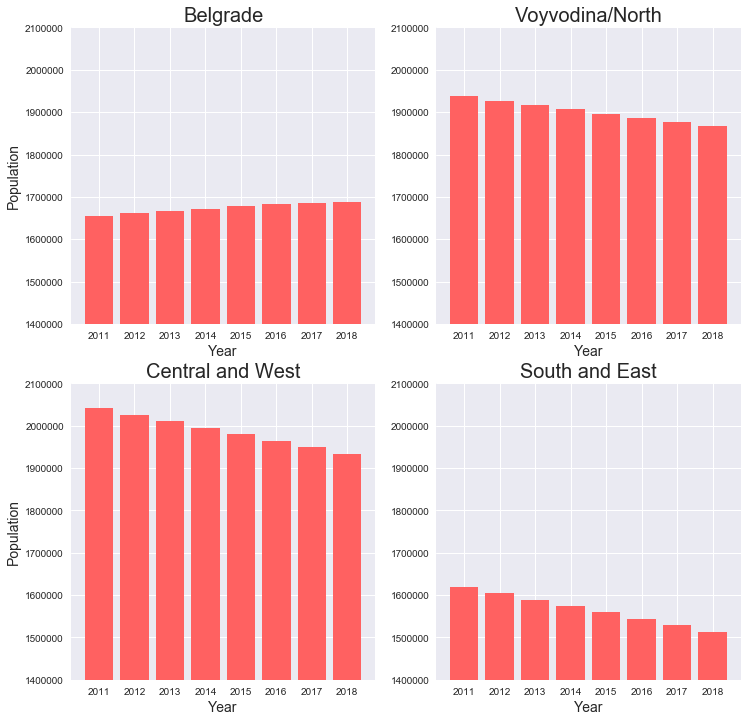

In [98]:
pop = pd.read_csv('population.csv')
state_pop = pop.loc[pop['Region']=='State']

fig1, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar('Year', 'Amount', data=state_pop, color=dcolor)
ax1.set_ylim(6_900_000, 7_400_000)
ax1.set_xlabel('Year', fontsize=slabel)
ax1.set_ylabel('Population', fontsize=slabel)
ax1.set_title('Total', fontsize=stitle)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

for idx, region in enumerate(pop['Region'].unique()[1:]):
    curr_data = pop.loc[pop['Region']==region]
    
    ax[idx].bar('Year', 'Amount', data=curr_data, color=d2color)
    ax[idx].set_ylim(1_400_000, 2_100_000)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    if idx%2==0:
        ax[idx].set_ylabel('Population', fontsize=slabel)
    ax[idx].set_title(region, fontsize=stitle)

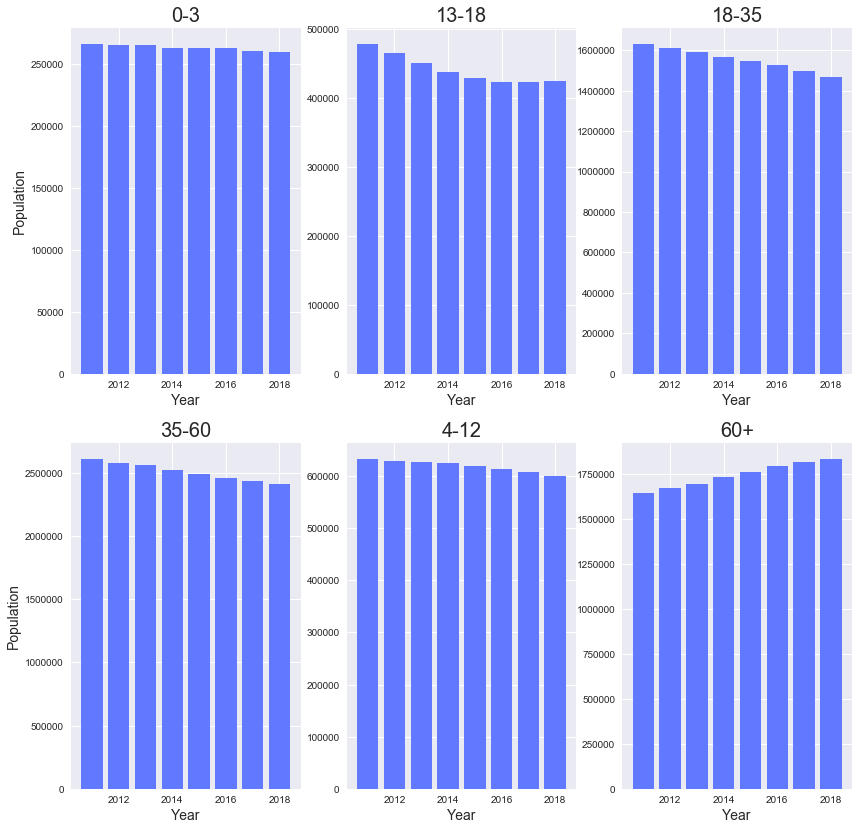

In [99]:
age_pop = pop.loc[(pop['Region']=='State')&(pop['AgeGroup']!=-1)&(
                   pop['Gender']=='Total')].reset_index(drop=True).drop(['Region', 
                   'Gender'], axis=1)

x = age_pop['AgeGroup']
condlist = [x.isin(range(4)), x.isin(range(4, 13)), x.isin(range(13, 19)), 
            x.isin(range(19, 36)), x.isin(range(36, 61)), x.isin(range(61, 86))]
choicelist = ['0-3', '4-12', '13-18', '18-35', '35-60', '60+']

age_pop['AgeGroup'] = np.select(condlist, choicelist)
age_pop = age_pop.groupby(['AgeGroup', 'Year']).sum()

age_pop = age_pop.reset_index()

fig, ax = plt.subplots(2, 3, figsize=(14, 14))
ax = ax.flatten()

for idx, group in enumerate(age_pop['AgeGroup'].unique()):
    curr_data = age_pop.loc[age_pop['AgeGroup']==group]
    
    ax[idx].bar('Year', 'Amount', data=curr_data, color=dcolor)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    if idx%3==0:
        ax[idx].set_ylabel('Population', fontsize=slabel)
    ax[idx].set_title(group, fontsize=stitle)

### Natural Increase

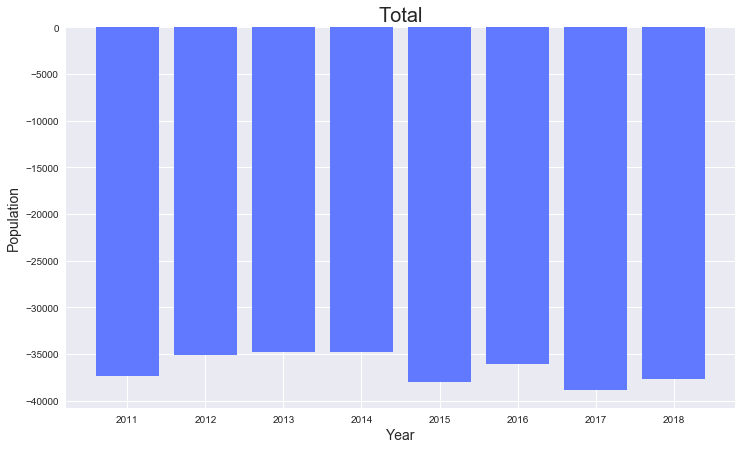

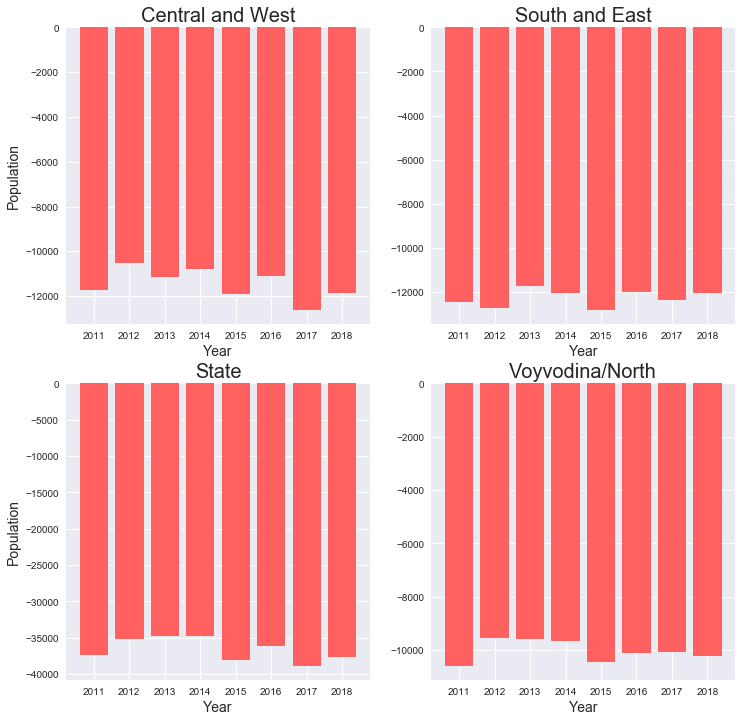

In [100]:
natural_increase = pd.read_csv('natural_increase.csv')

fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.bar('Year', 'Amount', data=natural_increase, color=dcolor)
ax1.set_xlabel('Year', fontsize=slabel)
ax1.set_ylabel('Population', fontsize=slabel)
ax1.set_title('Total', fontsize=stitle)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

for idx, region in enumerate(natural_increase['Region'].unique()[1:]):
    curr_data = natural_increase.loc[natural_increase['Region']==region]
    
    ax[idx].bar('Year', 'Amount', data=curr_data, color=d2color)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    if idx%2==0:
        ax[idx].set_ylabel('Population', fontsize=slabel)
    ax[idx].set_title(region, fontsize=stitle)

&emsp;We can see that, besides other economic problems, Serbia has a big problem with declining population. Poor economic factors, low salaries, high unemployment rate, many things influence this negative outcome.<br>
&emsp;The question of Serbian diaspora is also prevelant in the world with notable comunities in Germany, Austria, Canada (Toronto), USA (Chicago) and naturally, Ex-Yu states. Sadly, I don't have any data to show for this statement but per some sources, there is approximately as many as __5.1 million__ Serbs outside of Serbia and the number just keeps increasing.
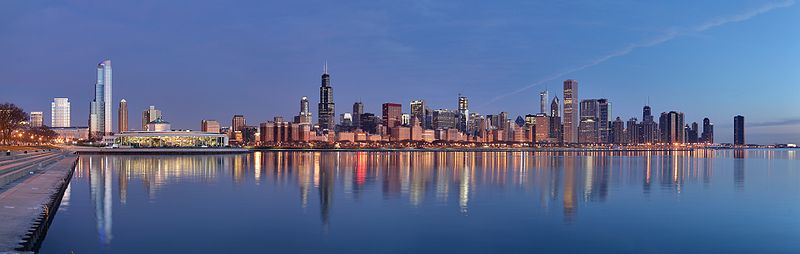<br>
_Chicago, IL_ - An estimated 350 000 ethnic Serbs live in Chicago area

### CPI

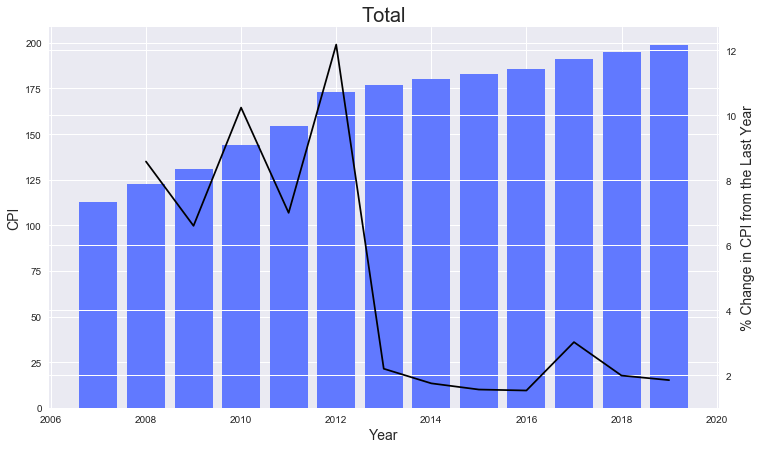

Year                                ExpenditureCategory  CPI(2006=100)  \
111   2014  Audio-Visual, Photographic and Computer Equipm...     210.100000   
165   2016                                              Books     274.500000   
574   2014                                              Fruit     168.500000   
577   2017                                              Fruit     195.700000   
579   2019                                              Fruit     193.400000   
692   2015   Grearer Lasting Goods for Culture and Recreation      85.400000   
745   2015                           Hosehold Electric Energy     212.700000   
809   2014                                          Insurance     141.800000   
844   2014                                      Mail Services     168.700000   
849   2019                                      Mail Services     201.300000   
962   2015                                Musical Instruments      85.400000   
991   2018                           Newspapers and Magazines     161.000000   
1040  2015                                      Oils and Fats     180.100000   
1187  2018                     Other Vehicle Related Services     179.000000   
1192  2015                                      Package Deals     218.300000   
1193  2016                                      Package Deals     283.000000   
1194  2017                                      Package Deals     319.800000   
1195  2018                                      Package Deals     357.700000   
1196  2019                                      Package Deals     405.400000   
1527  2015                                Telephone Equipment     156.500000   
1528  2016                                Telephone Equipment     174.100000   
1588  2015                                            Tobacco     416.200000   
1668  2017                                         Vegetables     237.900000   
1669  2018                                         Vegetables     285.100000   
1678  2014                                  Vehicle Insurance     137.500000   

       %Change  
111  14.370000  
165  12.220000  
574  19.930000  
577  21.250000  
579  11.280000  
692  10.620000  
745  12.240000  
809  27.630000  
844  31.180000  
849  19.320000  
962  10.620000  
991  18.300000  
1040 12.920000  
1187 20.780000  
1192 21.140000  
1193 29.640000  
1194 13.000000  
1195 11.850000  
1196 13.340000  
1527 12.270000  
1528 11.250000  
1588 12.880000  
1668 10.750000  
1669 19.840000  
1678 28.380000

In [101]:
cpi = pd.read_csv('cpi.csv')

cpi = cpi.loc[cpi['Month']==12].drop('Month', axis=1).reset_index(drop=True)
cpi = cpi.sort_values(['ExpenditureCategory', 'Year'])

cpi['LastYr'] = cpi['CPI(2006=100)'].shift(1).fillna(0)
cpi['%Change'] = round((cpi['CPI(2006=100)']-cpi['LastYr'])/cpi['LastYr']*100, 2)
cpi.loc[cpi['%Change']==np.Infinity, '%Change'] = 0
cpi = cpi.drop('LastYr', axis=1).reset_index(drop=True)

total_cpi = cpi.loc[cpi['ExpenditureCategory']=='Total']

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar('Year', 'CPI(2006=100)', data=total_cpi,
       color=dcolor)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('CPI', fontsize=slabel)
ax.set_title('Total', fontsize=stitle)

ax1 = ax.twinx()
ax1.plot('Year', '%Change', data=total_cpi.iloc[1:],
        color='k')
ax1.set_ylabel('% Change in CPI from the Last Year', fontsize=slabel)

plt.show()

#Not accounting for inflation years
cpi_crit = cpi.loc[(cpi['%Change']>10)&(~cpi['Year'].isin(range(2007, 2014)))]
display(cpi_crit)

### Household Spending

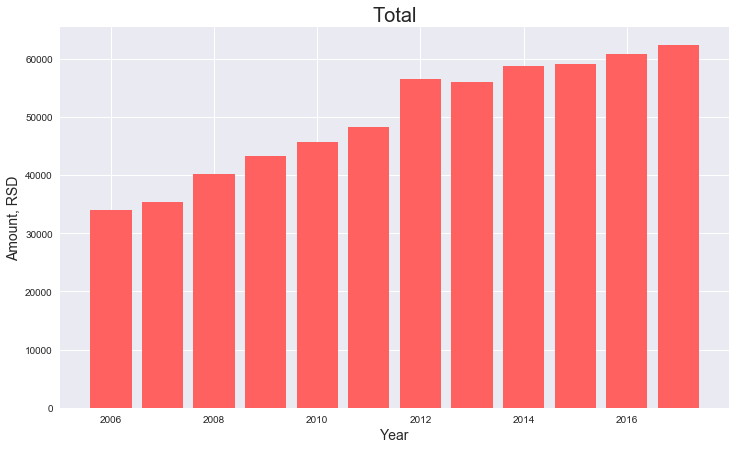

Year                     TypeOfSpending  Amount(RSD)  \
143  2017                              Total 62275.000000   
144  2017   Food and Non-Alcoholic Beverages 21472.000000   
145  2017     Alcohol, Tobacco and Narcotics  2942.000000   
146  2017              Clothing and Footwear  3282.000000   
147  2017  Housing, Water, Energy, Gas, etc. 10639.000000   
148  2017     Home Equipment and Maintenance  2714.000000   
149  2017                             Health  2715.000000   
150  2017                          Transport  5563.000000   
151  2017                      Communication  3316.000000   
152  2017             Culture and Recreation  3241.000000   
153  2017                          Education   892.000000   
154  2017             Hotels and Restaurants  1796.000000   
155  2017           Other Items and Services  3703.000000   

     StructuralPercentage  
143            100.000000  
144             34.500000  
145              4.700000  
146              5.300000  
147             17.100000  
148              4.400000  
149              4.400000  
150              8.900000  
151              5.300000  
152              5.200000  
153              1.400000  
154              2.900000  
155              5.900000

In [102]:
spending_hh = pd.read_csv('spending_hh.csv')

spending_hh = spending_hh.loc[(spending_hh['Region']=='State')&(spending_hh[
              'SettlementType']=='Total')].reset_index(drop=True).drop([
              'Region', 'SettlementType'], axis=1)
total_spending_hh = spending_hh.loc[spending_hh['TypeOfSpending']=='Total']

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar('Year', 'Amount(RSD)', data=total_spending_hh, color=d2color)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Amount, RSD', fontsize=slabel)
ax.set_title('Total', fontsize=stitle)

plt.show()

display(spending_hh.loc[spending_hh['Year']==2017])

&emsp;This notebook was already long so I didn't want to add more repetitive bar charts of the change in price in the __CPI and Spending__ sector that would show the things we already discovered so I wanted to leave it at this and say that, whoever wants, can explore this further. I thought that results aren't interesting enough so I left it at this. Not fully empty, there is still something but it can be arguable if it is enough or isn't.

### Life Expectancy

Text(0.5, 1.0, 'Average Life Expectancy at Birth')

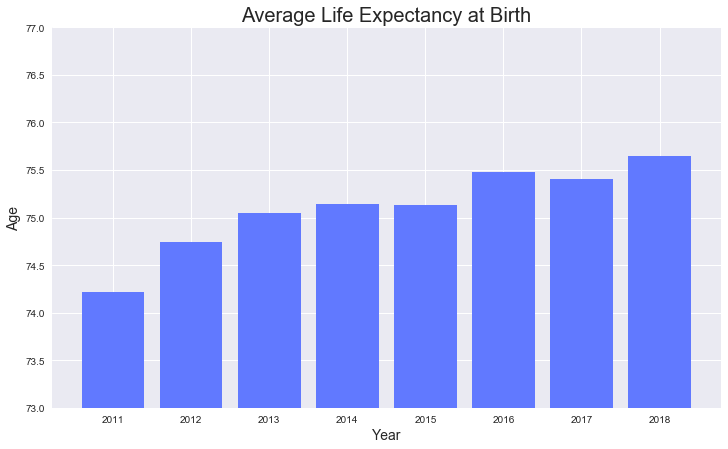

In [103]:
life_expect = pd.read_csv('life_expectancy.csv')
life_expect = life_expect.loc[(life_expect['Region']=='State')&(
                               life_expect['Gender']=='Total')].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar('Year', 'Amount', data=life_expect, color=dcolor)
ax.set_ylim(73, 77)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Age', fontsize=slabel)
ax.set_title('Average Life Expectancy at Birth', fontsize=stitle)

## Research and Development

&emsp;The last section we are going to take a look at is R&D. Most of the conclusions till now were mostly related to business and economics in the narrower sense and I think that the R&D sector is going to yield different results and also be, after all, a reflection of the image of the country's economy we've been seeing till now.
### Government Investitions

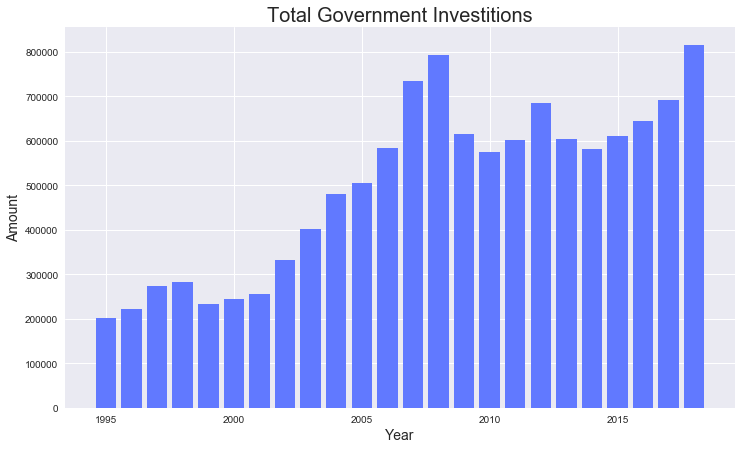

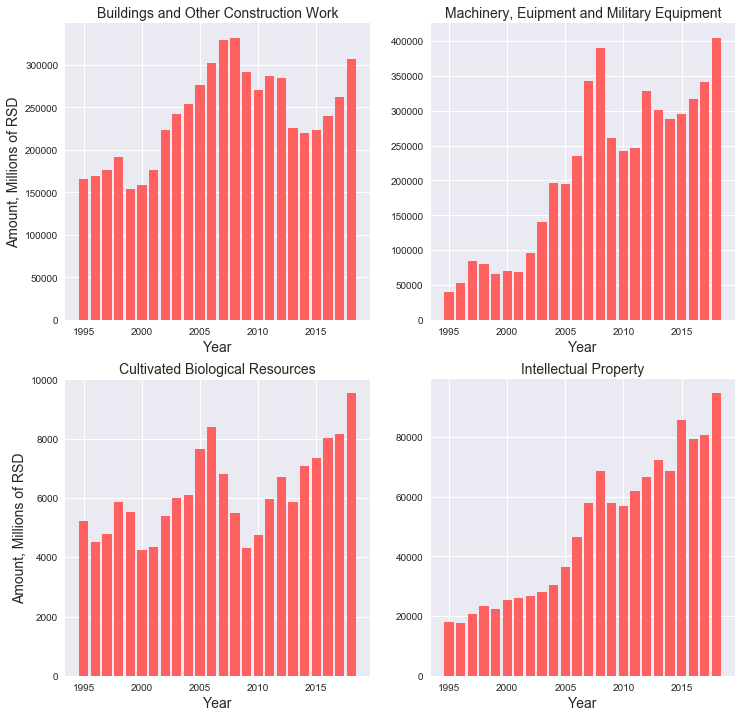

In [104]:
gov_invest = pd.read_csv('gov_investitions.csv')
gov_invest = gov_invest.loc[~gov_invest['Investition'].isin(['Apartment Buildings',
                            'Non-apartment Buildings and Other Construction Work'])]
gov_invest = gov_invest.reset_index(drop=True)

fig1, ax1 = plt.subplots(figsize=(12, 7))

ax1.bar('Year', 'Amount(mRSD)', color=dcolor,
        data=gov_invest.loc[gov_invest['Investition']=='Total'])
ax1.set_xlabel('Year', fontsize=slabel)
ax1.set_ylabel('Amount', fontsize=slabel)
ax1.set_title('Total Government Investitions', fontsize=stitle)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()

for idx, invest in enumerate(gov_invest['Investition'].unique()[1:]):
    curr_data = gov_invest.loc[gov_invest['Investition']==invest]
    
    ax[idx].bar('Year', 'Amount(mRSD)', data=curr_data, color=d2color)
    ax[idx].set_xlabel('Year', fontsize=slabel)
    if idx%2==0:
        ax[idx].set_ylabel('Amount, Millions of RSD', fontsize=slabel)
    ax[idx].set_title(invest, fontsize=slabel)

&emsp;Values here are, unfortunately, nominal. That makes it hard to deduce much and close to impossible to deduce anything _new_. High economic activity before The Great Recession and the increasing growth in the __Construction Sector__ are the conclusions we already came to. By that logic and looking at the charts, similar things can also be said for the __Cultivated Biological Resources__ and other sectors here that are previously not mentioned but as I said, I am not going to jump to conclusions based on growth in nominal values.

### R&D

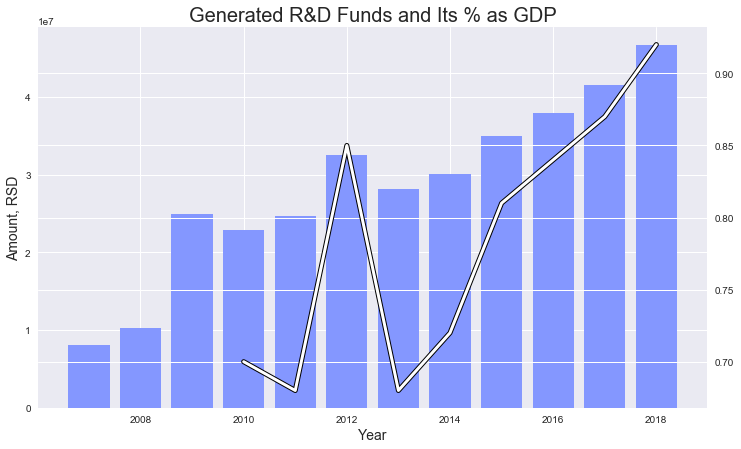

In [105]:
pct_gdp = pd.read_csv('rd_pct_gdp.csv')

gen_funds = pd.read_csv('rd_generated_funds.csv')
gen_funds = gen_funds.loc[(gen_funds['FundSource']=='Total Funds')&(
            gen_funds['Region']=='State')].drop(['FundSource', 'Region'],
            axis=1).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 7))

ax.bar('Year', 'Amount(RSD)', data=gen_funds, color=sbgcolor)
ax.set_xlabel('Year', fontsize=slabel)
ax.set_ylabel('Amount, RSD', fontsize=slabel)
ax.set_title('Generated R&D Funds and Its % as GDP', fontsize=stitle)

ax1 = ax.twinx()
ax1.plot('Year', 'GDPPct', data=pct_gdp, color='k', linewidth=5)
ax1.plot('Year', 'GDPPct', data=pct_gdp, color='w', linewidth=3);

&emsp; The steady growth in __Geberated Funds for R&D__ seems to be the trend here. By now we already concluded that Serbia, even if it is not perfect or the best, is entering a better economic age and that can be seen, after all, in the R&D sector.

### Education (HS)
NOTE: Noted in the Glossary

In [106]:
hs = pd.read_csv('high_school.csv')
hs = hs.loc[hs['Gender']=='Total'].reset_index(drop=True)

display(hs.loc[hs['SchoolYear']=='2017/18'])

SchoolYear                             Programme Gender  Students
138    2017/18                                 Total  Total     57478
139    2017/18                  General-education HS  Total     15245
140    2017/18       Agriculture and Good Production  Total      3052
141    2017/18          Forestry and Wood Processing  Total       564
142    2017/18        Geology, Mining and Metallurgy  Total       283
143    2017/18        Machinery and Metal Processing  Total      4479
144    2017/18                Electrical Engineering  Total      5805
145    2017/18    Chemistry, Graphene and Non-metals  Total      1922
146    2017/18        Textile and Learher Processing  Total       562
147    2017/18              Geodesy and Construction  Total      1057
148    2017/18                        Transportation  Total      2941
149    2017/18             Trade, Hotels and Tourism  Total      5223
150    2017/18       Economy, Law and Administration  Total      8220
151    2017/18                      Hydrometeorology  Total        46
152    2017/18  Culutre, Arts and Public Information  Total      1161
153    2017/18             Health and Social Welfare  Total      6061
154    2017/18             Other (Personal Services)  Total       781
155    2017/18                       Military School  Total        76

&emsp;I don't want to look for excuses but I can't even try to start to explain how incomplete this data is (mentioned in Glossary): No primary school, college, masters or Ph.D. data (that is at least sufficient). I might be whining, but that is just how it is, and I think that plotting a bunch of barplots of how many HS students graduated in which Programme is not going to contribute much to everything we already came to know.<br>
&emsp; I think we came to some useful conclusions here and I hope the notebook was interesting. For more whining/explanation about the incompetence of the data I worked with, feel free to refer to the Glossary.<br>
In the end, here is a beautiful picture of a landscape in Serbia, to remind that not all things are exactly in a bad shape over there.
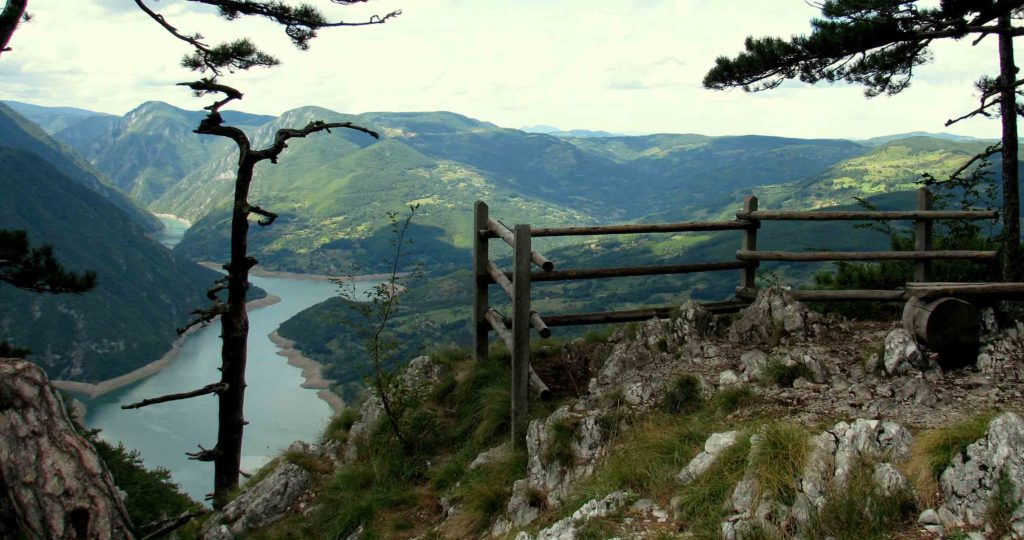<br>
_Tara Mountain_ - National Park